# Facebook Business Activity Trends during COVID-19
ECM443 - Introduction to Data Science Coursework

In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
'''import os
import glob
os.chdir("C:/Users/LEGION/Documents/Msc Data Science - Uni of Exeter/ECMM443 - Introduction to Data Science (2023)/Coursework/data")

# use glob to match the pattern 'csv'
# match the pattern ('csv') and save the list of file names as `all_filenames`
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))] #loops through the csv's and saves the filenames

# combine all files in the list
facebookBAT_df = pd.concat([pd.read_csv(f) for f in all_filenames]) #loops through all_filenames, saves them in a list and combines them
facebookBAT_df.to_csv("combined_dataset.csv", index=False, encoding='utf-8-sig')
'''

'import os\nimport glob\nos.chdir("C:/Users/LEGION/Documents/Msc Data Science - Uni of Exeter/ECMM443 - Introduction to Data Science (2023)/Coursework/data")\n\n# use glob to match the pattern \'csv\'\n# match the pattern (\'csv\') and save the list of file names as `all_filenames`\nextension = \'csv\'\nall_filenames = [i for i in glob.glob(\'*.{}\'.format(extension))] #loops through the csv\'s and saves the filenames\n\n# combine all files in the list\nfacebookBAT_df = pd.concat([pd.read_csv(f) for f in all_filenames]) #loops through all_filenames, saves them in a list and combines them\nfacebookBAT_df.to_csv("combined_dataset.csv", index=False, encoding=\'utf-8-sig\')\n'

In [3]:
df = pd.read_csv("./data/combined_dataset.csv")

In [4]:
df.shape

(2396549, 12)

#### Part 1: Basic Stats & Metrics
**1. Count the number of countries/regions being mentioned in the dataset.**

The data is broken down only on country level (gadm0) and there are 220 countries in total that are listed here.

In [5]:
df

,gadm_id,gadm_name,gadm_level,gadm0_name,gadm1_name,gadm2_name,country,business_vertical,activity_quantile,activity_percentage,crisis_ds,ds
0,LUX,Luxembourg,0,Luxembourg,NaN,NaN,LU,Retail,0.550204,116.600990,2020-03-01,2020-03-01
1,LUX,Luxembourg,0,Luxembourg,NaN,NaN,LU,Home Services,0.641146,113.705543,2020-03-01,2020-03-01
2,LUX,Luxembourg,0,Luxembourg,NaN,NaN,LU,Local Events,0.663123,103.226699,2020-03-01,2020-03-01
3,LUX,Luxembourg,0,Luxembourg,NaN,NaN,LU,Manufacturing,0.504707,103.525641,2020-03-01,2020-03-01
4,CZE,Czech Republic,0,Czech Republic,NaN,NaN,CZ,All,0.583032,108.645654,2020-03-01,2020-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...
2396544,TON,Tonga,0,Tonga,NaN,NaN,TO,Home Services,0.455671,435.975067,2020-03-01,2022-11-29
2396545,TON,Tonga,0,Tonga,NaN,NaN,TO,Retail,0.531731,151.621622,2020-03-01,2022-11-29
2396546,TON,Tonga,0,Tonga,NaN,NaN,TO,All,0.313514,129.951923,2020-03-01,2022-11-29
2396547,TON,Tonga,0,Tonga,NaN,NaN,TO,Travel,0.173580,32.553191,2020-03-01,2022-11-29


In [6]:
df.gadm_name.nunique()

220

In [7]:
# percentage of NaN values
((df.isna().sum())*100/df.shape[0]).round(2)

gadm_id                  0.00
gadm_name                0.00
gadm_level               0.00
gadm0_name               0.00
gadm1_name             100.00
gadm2_name             100.00
country                  1.59
business_vertical        0.00
activity_quantile        0.00
activity_percentage      0.00
crisis_ds                0.00
ds                       0.00
dtype: float64

In [8]:
df.gadm_name.unique()

array(['Luxembourg', 'Czech Republic', 'Germany', 'Malta',
       'Virgin Islands, U.S.', 'Anguilla', 'Lesotho', 'Gabon', 'Kiribati',
       'South Africa', 'Bahrain', 'Slovenia', 'Liberia', 'Aruba',
       'Saint Pierre and Miquelon', 'Sint Maarten', 'Equatorial Guinea',
       'Saint Helena', 'Rwanda', 'Andorra', 'Jersey', 'Gibraltar',
       'Brunei', 'Swaziland', 'Tonga', 'Zimbabwe', 'Djibouti',
       'Northern Cyprus', 'Benin', 'Central African Republic',
       'Guatemala', 'New Caledonia', 'United Arab Emirates', 'Latvia',
       'Niue', 'Saint Vincent and the Grenadines', 'Switzerland',
       'French Guiana', 'Comoros', 'Bulgaria', 'Lithuania', 'Laos',
       'Macedonia', 'Turks and Caicos Islands', 'American Samoa', 'Niger',
       'Serbia', 'Nepal', 'Turkey', 'Papua New Guinea', 'Qatar',
       'Netherlands', 'Hungary', 'Curaçao', 'Angola', 'Kyrgyzstan',
       'Caspian Sea', 'Ecuador', 'Mozambique', 'Armenia', 'Gambia',
       'Trinidad and Tobago', 'Akrotiri and Dhekelia'

**2. Count the total number of dates available for each country/state, in terms of the type of business. Describe missing values/duplicates (if there are any), and how you deal with anomalies (if there are any).**

*Answer* <span style="color:yellow">Find out if there is any particular date that is missing.</span> There is none because the number of days between March 1st 2020 and November 29 2022 inclusive is 1,004 days.

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396549 entries, 0 to 2396548
Data columns (total 12 columns):
 #   Column               Dtype  
---  ------               -----  
 0   gadm_id              object 
 1   gadm_name            object 
 2   gadm_level           int64  
 3   gadm0_name           object 
 4   gadm1_name           float64
 5   gadm2_name           float64
 6   country              object 
 7   business_vertical    object 
 8   activity_quantile    float64
 9   activity_percentage  float64
 10  crisis_ds            object 
 11  ds                   object 
dtypes: float64(4), int64(1), object(7)
memory usage: 219.4+ MB


First of all, we can see that there based on the formatting of the data and keeping in mind the business verticals that were collected for each country, there is no missing value. But do all countries have the same number of dates captured?

In [10]:
countofDates = df.groupby('gadm_name')['ds'].count()

In [11]:
countofDates

gadm_name
Akrotiri and Dhekelia     7028
Albania                  12048
Algeria                  12048
American Samoa            6024
Andorra                  12048
                         ...  
Vietnam                  12048
Virgin Islands, U.S.     12048
Zambia                   12048
Zimbabwe                 12048
Åland                    12048
Name: ds, Length: 220, dtype: int64

In [12]:
((countofDates.value_counts() * 100)/countofDates.value_counts().sum()).round(2)

12048    73.18
10040     6.82
11044     5.91
9036      3.18
1004      3.18
7028      1.82
6024      1.36
4016      1.36
8032      0.91
5020      0.91
3012      0.91
2009      0.45
Name: ds, dtype: float64

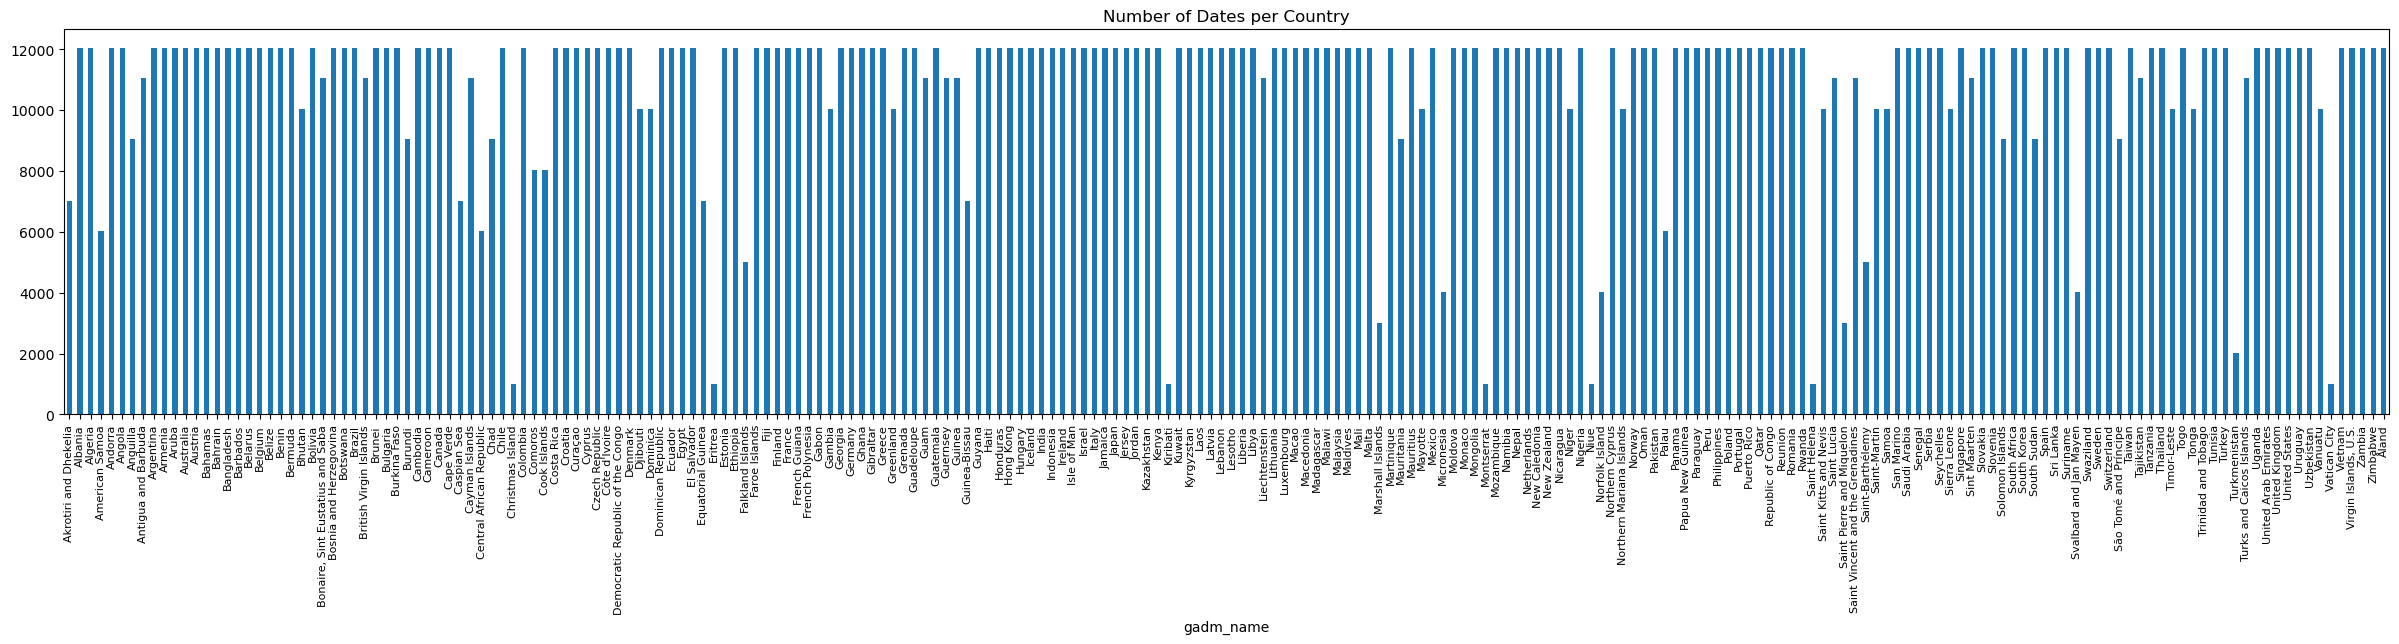

In [13]:
fig, ax = plt.subplots(figsize=(30,5))
plt.xticks(fontsize=8)
countofDates.plot.bar(ax=ax, title='Number of Dates per Country');

Now, let's have a look at the start and end dates in the `ds` column for each country.

In [14]:
df.groupby('gadm_name')['ds'].min().value_counts()

2020-03-01    220
Name: ds, dtype: int64

Okay, we can see that all countries started their data capture on the crisis date.

In [15]:
df.groupby('gadm_name')['ds'].max().value_counts()

2022-11-29    220
Name: ds, dtype: int64

Hmmm...and all also have the same end date. Which dates are then missing if they all have the same start and end date?

In [16]:
df.groupby('gadm_name')['ds'].nunique()

gadm_name
Akrotiri and Dhekelia    1004
Albania                  1004
Algeria                  1004
American Samoa           1004
Andorra                  1004
                         ... 
Vietnam                  1004
Virgin Islands, U.S.     1004
Zambia                   1004
Zimbabwe                 1004
Åland                    1004
Name: ds, Length: 220, dtype: int64

In [17]:
df.groupby('gadm_name')['ds'].nunique().value_counts()

1004    220
Name: ds, dtype: int64

Interesting. Now we can see that there is actually no missing date values because all 1004 dates have been captured for all 220 countries. However, the difference in counts of dates come from some countries missing business verticals as each has a date attached to it as can been seen below.

Breaking the dates captured per business vertical. Some countries have NaN values because those business verticals were not captured probably because such industries aren't represented well on Facebook Business pages.

In [18]:
df.groupby(['gadm_name','business_vertical'])['ds'].count().unstack()

business_vertical,All,Business & Utility Services,Grocery & Convenience Stores,Home Services,Lifestyle Services,Local Events,Manufacturing,Professional Services,Public Good,Restaurants,Retail,Travel
gadm_name,,,,,,,,,,,,
Akrotiri and Dhekelia,1004.0,NaN,NaN,1004.0,1004.0,1004.0,NaN,1004.0,NaN,1004.0,1004.0,NaN
Albania,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0
Algeria,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0
American Samoa,1004.0,NaN,NaN,1004.0,1004.0,NaN,NaN,NaN,1004.0,1004.0,1004.0,NaN
Andorra,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Vietnam,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0
"Virgin Islands, U.S.",1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0
Zambia,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0,1004.0


In [19]:
df['business_vertical'].unique()

array(['Retail', 'Home Services', 'Local Events', 'Manufacturing', 'All',
       'Public Good', 'Travel', 'Lifestyle Services',
       'Business & Utility Services', 'Professional Services',
       'Grocery & Convenience Stores', 'Restaurants'], dtype=object)

In [20]:
(df.groupby(['gadm_name','business_vertical'])['ds'].count().unstack().isna().sum()/220).round(2)*100

business_vertical
All                              0.0
Business & Utility Services     10.0
Grocery & Convenience Stores    21.0
Home Services                    6.0
Lifestyle Services              14.0
Local Events                     8.0
Manufacturing                   25.0
Professional Services            8.0
Public Good                      6.0
Restaurants                      5.0
Retail                           4.0
Travel                           7.0
dtype: float64

From the data, we can see that the amount of missing values business verticals in all countries in this dataset has been kept minimal seeing as the most business vertical with missing values in the `ds` column is the Manufacturing business vertical followed by the Grocery & Convenience Stores. Can we look deeper to see what kind of countries have this missing values? Also, we can notice that the All category has no missing value.

In [21]:
missVals_mask = df.groupby(['gadm_name','business_vertical'])['ds'].count().unstack().isna()

In [22]:
missVals_mask[missVals_mask.sum(axis=1) > 0].index

Index(['Akrotiri and Dhekelia', 'American Samoa', 'Anguilla',
       'Antigua and Barbuda', 'Bhutan', 'Bonaire, Sint Eustatius and Saba',
       'British Virgin Islands', 'Burundi', 'Caspian Sea', 'Cayman Islands',
       'Central African Republic', 'Chad', 'Christmas Island', 'Comoros',
       'Cook Islands', 'Djibouti', 'Dominica', 'Equatorial Guinea', 'Eritrea',
       'Falkland Islands', 'Gambia', 'Greenland', 'Guam', 'Guernsey', 'Guinea',
       'Guinea-Bissau', 'Kiribati', 'Liechtenstein', 'Marshall Islands',
       'Mauritania', 'Mayotte', 'Micronesia', 'Montserrat', 'Niger', 'Niue',
       'Norfolk Island', 'Northern Mariana Islands', 'Palau', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Lucia', 'Saint Pierre and Miquelon',
       'Saint Vincent and the Grenadines', 'Saint-Barthélemy', 'Saint-Martin',
       'Samoa', 'Sierra Leone', 'Sint Maarten', 'Solomon Islands',
       'South Sudan', 'Svalbard and Jan Mayen', 'São Tomé and Príncipe',
       'Tajikistan', 'Timor-L

Above are the countries that have at least 1 business vertical with no dates associated with it.

In [23]:
missVals_mask.sum(axis=1)[missVals_mask.sum(axis=1) > 0]

gadm_name
Akrotiri and Dhekelia                5
American Samoa                       6
Anguilla                             3
Antigua and Barbuda                  1
Bhutan                               2
Bonaire, Sint Eustatius and Saba     1
British Virgin Islands               1
Burundi                              3
Caspian Sea                          5
Cayman Islands                       1
Central African Republic             6
Chad                                 3
Christmas Island                    11
Comoros                              4
Cook Islands                         4
Djibouti                             2
Dominica                             2
Equatorial Guinea                    5
Eritrea                             11
Falkland Islands                     7
Gambia                               2
Greenland                            2
Guam                                 1
Guernsey                             1
Guinea                               1
Guinea-Bissau  

In [24]:
(missVals_mask.sum(axis=1)[missVals_mask.sum(axis=1) > 0].value_counts(normalize=True)*100).round(2).sort_index(ascending=False)

11    11.86
9      5.08
8      5.08
7      3.39
6      5.08
5      6.78
4      3.39
3     11.86
2     25.42
1     22.03
dtype: float64

In [25]:
df.business_vertical.nunique()

12

In [26]:
11.86+25.42+22.03

59.31

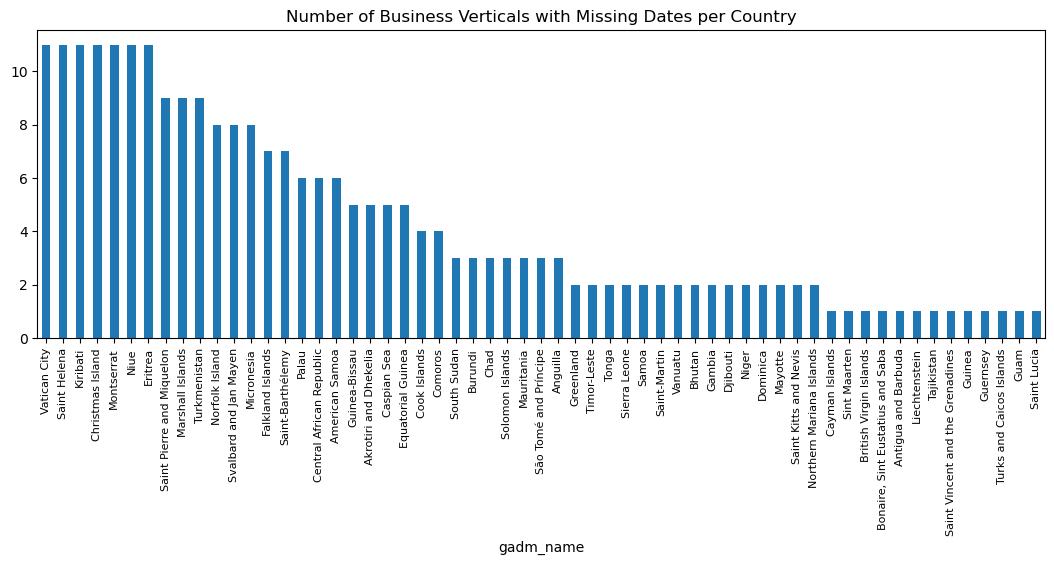

In [27]:
fig, ax = plt.subplots(figsize=(13,4))
missVals_mask.sum(axis=1)[missVals_mask.sum(axis=1) > 0].sort_values(ascending=False).plot.bar(ax=ax, title='Number of Business Verticals with Missing Dates per Country')
plt.xticks(fontsize=8);

Note that there is no country with 12 missing values, when looking at business verticals, because all countries have data in the `All` business vertical. From the graph above, we can see that interestingly, majority of the countries with missing values (59.31%) just have 1 to 3 business verticals with missing values.

**3. There are two metrics in the data: `activity_quantile` and `activity_percentage`. Look at the metadata of the dataset and write your understanding about these two metrics, e.g., how are they calculated (using equations), and what do they mean in the real world?**

*Remember that `activity_quantile` looks at the change in daily posting activity of a business while `activity_percentage` looks at the weekend change and remember that there's a cummulative sum.*

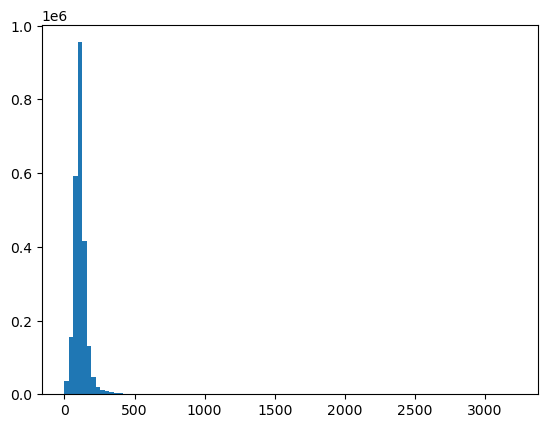

In [28]:
plt.hist(df.activity_percentage, bins=100);
#plt.xlim(0,800);

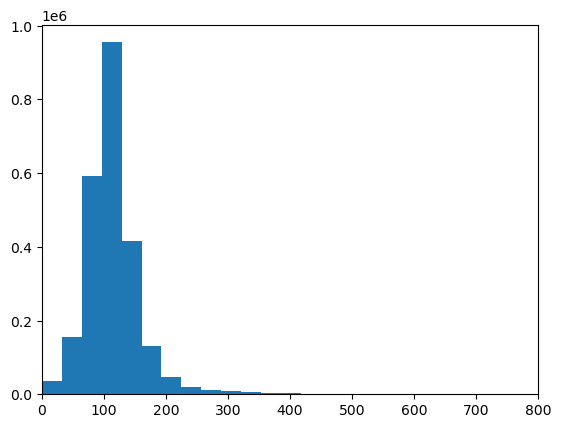

In [29]:
# can you show a vertical line at 100 which depicts normal level?
plt.hist(df.activity_percentage, bins=100)
plt.xlim(0,800);

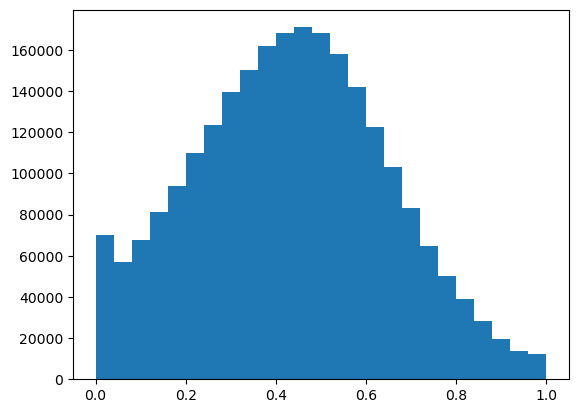

In [30]:
# have a vertical line running from 0.5 depicting the normal levels
plt.hist(df.activity_quantile, bins=25);

**4. Choose 5 different countries (preferably from different continents), plot time-series figures for your chosen type(s) of business. Comment on what you see.**

I chose to do my analysis on these 5 countries <span style="color:red">**(Replace Sweden with an Asian country)**</span>;
* *Brazil*: Known for its varying response across different regions and its struggle to contain the virus, Brazil faced significant challenges. Analyzing Brazil's experience can shed light on the impact of decentralized policies and how they affected businesses in different regions.
* *United Kingdom*: With varying phases of restrictions and a blend of local and nationwide responses, the UK presents a complex scenario. Studying the UK could provide insights into the effectiveness of different levels of restrictions on businesses.
* *Nigeria*: Nigeria's respponse to the pandemic and its implications for businesses could offer a personal perspective. It might also provide insights into the challenges faced by developing countries and the resilience of local businesses
* *New Zealand*: Renowned for its proactive and stringent approach to containing the virus, New Zealand's measures were aimed at rapid containment. Analyzing the impact of these measures on businesses could reveal how strict policies affected various sectors.
* *Kyrgyzstan*: Why this?
* ~~*Sweden*: Known for its relatively relaxed approach with minimal restrictions, Sweden's case offers an alternative perspective on managing the pandemic. It could provide insights into how lenient policies affected businesses and the economy.~~

Time to clean the data.

Change `crisis_ds` and `ds` to dateTime dtype

In [31]:
df['ds'] = pd.to_datetime(df.ds)
df['crisis_ds'] = pd.to_datetime(df.crisis_ds)

In [32]:
# test
df[['crisis_ds','ds']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396549 entries, 0 to 2396548
Data columns (total 2 columns):
 #   Column     Dtype         
---  ------     -----         
 0   crisis_ds  datetime64[ns]
 1   ds         datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 36.6 MB


Drop `gadm1_name`, `gadm2_name`, `gadm_level` and `country` because they're completely NaN.

In [33]:
df = df.drop(labels=['gadm1_name','gadm2_name','gadm_level','country','gadm0_name'], axis=1)

In [34]:
# test
df.columns

Index(['gadm_id', 'gadm_name', 'business_vertical', 'activity_quantile',
       'activity_percentage', 'crisis_ds', 'ds'],
      dtype='object')

In [35]:
df

,gadm_id,gadm_name,business_vertical,activity_quantile,activity_percentage,crisis_ds,ds
0,LUX,Luxembourg,Retail,0.550204,116.600990,2020-03-01,2020-03-01
1,LUX,Luxembourg,Home Services,0.641146,113.705543,2020-03-01,2020-03-01
2,LUX,Luxembourg,Local Events,0.663123,103.226699,2020-03-01,2020-03-01
3,LUX,Luxembourg,Manufacturing,0.504707,103.525641,2020-03-01,2020-03-01
4,CZE,Czech Republic,All,0.583032,108.645654,2020-03-01,2020-03-01
...,...,...,...,...,...,...,...
2396544,TON,Tonga,Home Services,0.455671,435.975067,2020-03-01,2022-11-29
2396545,TON,Tonga,Retail,0.531731,151.621622,2020-03-01,2022-11-29
2396546,TON,Tonga,All,0.313514,129.951923,2020-03-01,2022-11-29
2396547,TON,Tonga,Travel,0.173580,32.553191,2020-03-01,2022-11-29


In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396549 entries, 0 to 2396548
Data columns (total 7 columns):
 #   Column               Dtype         
---  ------               -----         
 0   gadm_id              object        
 1   gadm_name            object        
 2   business_vertical    object        
 3   activity_quantile    float64       
 4   activity_percentage  float64       
 5   crisis_ds            datetime64[ns]
 6   ds                   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), object(3)
memory usage: 128.0+ MB


In [37]:
df.gadm_name.nunique()

220

In [38]:
df.gadm_id.nunique()

220

In [39]:
df.business_vertical.value_counts()

All                             220880
Retail                          210841
Restaurants                     208832
Home Services                   206824
Public Good                     206824
Travel                          205820
Local Events                    203812
Professional Services           203812
Business & Utility Services     199796
Lifestyle Services              190760
Grocery & Convenience Stores    173692
Manufacturing                   164656
Name: business_vertical, dtype: int64

Change business vertical, gadm_id and gadm_name to a categorical dtype

In [40]:
df['gadm_id'] = df['gadm_id'].astype('category')
df['gadm_name'] = df['gadm_name'].astype('category')
df['business_vertical'] = df['business_vertical'].astype('category')

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2396549 entries, 0 to 2396548
Data columns (total 7 columns):
 #   Column               Dtype         
---  ------               -----         
 0   gadm_id              category      
 1   gadm_name            category      
 2   business_vertical    category      
 3   activity_quantile    float64       
 4   activity_percentage  float64       
 5   crisis_ds            datetime64[ns]
 6   ds                   datetime64[ns]
dtypes: category(3), datetime64[ns](2), float64(2)
memory usage: 84.6 MB


Notice the reduction in memory usage.

Now, back to the question *plot time-series figures for your chosen type(s) of business*

In [42]:
choice_countries = ['Brazil', 'United Kingdom', 'Nigeria', 'Kyrgyzstan', 'New Zealand']

In [43]:
choice_df = df.query("gadm_name in @choice_countries").copy()
choice_df['gadm_name'] = choice_df.gadm_name.astype(str)
choice_df['business_vertical'] = choice_df.business_vertical.astype(str)

In [44]:
choice_df.groupby('gadm_name')['business_vertical'].nunique()

gadm_name
Brazil            12
Kyrgyzstan        12
New Zealand       12
Nigeria           12
United Kingdom    12
Name: business_vertical, dtype: int64

In [45]:
choice_df.business_vertical.unique()

array(['Business & Utility Services', 'Public Good', 'All', 'Retail',
       'Manufacturing', 'Lifestyle Services', 'Travel',
       'Grocery & Convenience Stores', 'Restaurants',
       'Professional Services', 'Local Events', 'Home Services'],
      dtype=object)

Let's have a look at Restaurants and All category

In [46]:
business_verticals = ['Restaurants', 'Grocery & Convenience Stores', 'All']
choice_df_busvert = choice_df.query("business_vertical in @business_verticals").copy()

In [47]:
choice_df_busvert.set_index('ds', inplace=True)

In [48]:
choice_df_busvert[choice_df_busvert.gadm_name == 'Brazil']

,gadm_id,gadm_name,business_vertical,activity_quantile,activity_percentage,crisis_ds
ds,,,,,,
2020-03-01,BRA,Brazil,Grocery & Convenience Stores,0.535616,119.415402,2020-03-01
2020-03-01,BRA,Brazil,All,0.462480,110.330741,2020-03-01
2020-03-01,BRA,Brazil,Restaurants,0.622381,128.973187,2020-03-01
2020-03-02,BRA,Brazil,Grocery & Convenience Stores,0.571968,124.010322,2020-03-01
2020-03-02,BRA,Brazil,Restaurants,0.626137,129.375540,2020-03-01
...,...,...,...,...,...,...
2022-11-28,BRA,Brazil,Restaurants,0.317652,125.966786,2020-03-01
2022-11-28,BRA,Brazil,All,0.533880,136.244216,2020-03-01
2022-11-29,BRA,Brazil,Restaurants,0.306720,124.762302,2020-03-01


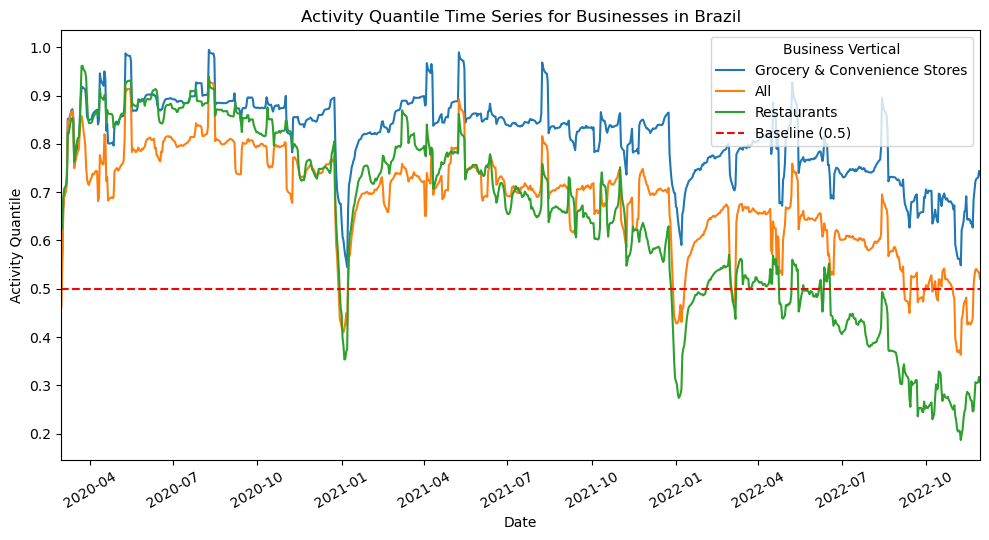

In [49]:
plt.figure(figsize=(10, 5.5))

plotData = choice_df_busvert[choice_df_busvert.gadm_name == 'Brazil']
sns.lineplot(data=choice_df_busvert[choice_df_busvert.gadm_name == 'Brazil'], x='ds', y='activity_quantile', hue='business_vertical', palette='tab10')

plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline (0.5)')

plt.title('Activity Quantile Time Series for Businesses in Brazil')
plt.xlabel('Date')
plt.ylabel('Activity Quantile')
plt.xlim([choice_df_busvert.index.min(),choice_df_busvert.index.max()])
#plt.ylim([0,1])
plt.xticks(rotation=30)
plt.legend(title='Business Vertical', loc='upper right')
plt.tight_layout()
plt.show()


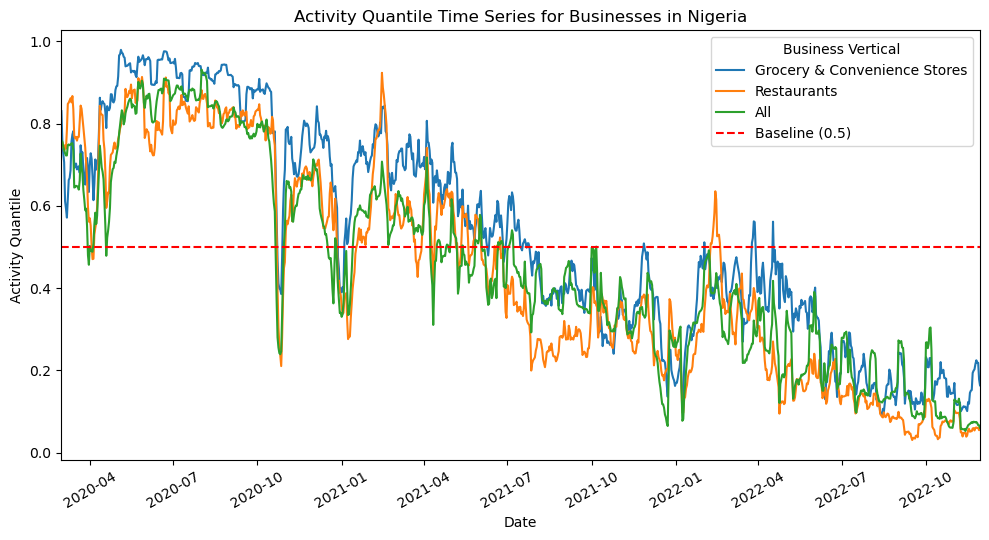

In [50]:
plt.figure(figsize=(10, 5.5))

plotData = choice_df_busvert[choice_df_busvert.gadm_name == 'Nigeria']
sns.lineplot(data=choice_df_busvert[choice_df_busvert.gadm_name == 'Nigeria'], x='ds', y='activity_quantile', hue='business_vertical', palette='tab10')

plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline (0.5)')

plt.title('Activity Quantile Time Series for Businesses in Nigeria')
plt.xlabel('Date')
plt.ylabel('Activity Quantile')
plt.xlim([choice_df_busvert.index.min(),choice_df_busvert.index.max()])
#plt.ylim([0,1])
plt.xticks(rotation=30)
plt.legend(title='Business Vertical', loc='upper right')
plt.tight_layout()
plt.show()


In [51]:
choice_df_busvert.gadm_name.unique()

array(['Kyrgyzstan', 'United Kingdom', 'Brazil', 'Nigeria', 'New Zealand'],
      dtype=object)

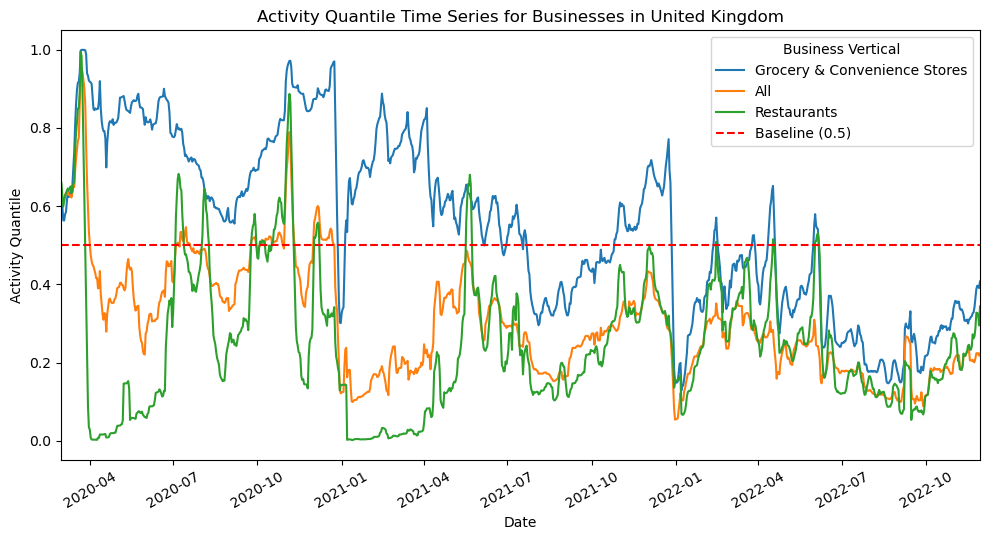

In [52]:
plt.figure(figsize=(10, 5.5))

plotData = choice_df_busvert[choice_df_busvert.gadm_name == 'United Kingdom']
sns.lineplot(data=choice_df_busvert[choice_df_busvert.gadm_name == 'United Kingdom'], x='ds', y='activity_quantile', hue='business_vertical', palette='tab10')

plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline (0.5)')

plt.title('Activity Quantile Time Series for Businesses in United Kingdom')
plt.xlabel('Date')
plt.ylabel('Activity Quantile')
plt.xlim([choice_df_busvert.index.min(),choice_df_busvert.index.max()])
#plt.ylim([0,1])
plt.xticks(rotation=30)
plt.legend(title='Business Vertical', loc='upper right')
plt.tight_layout()
plt.show()


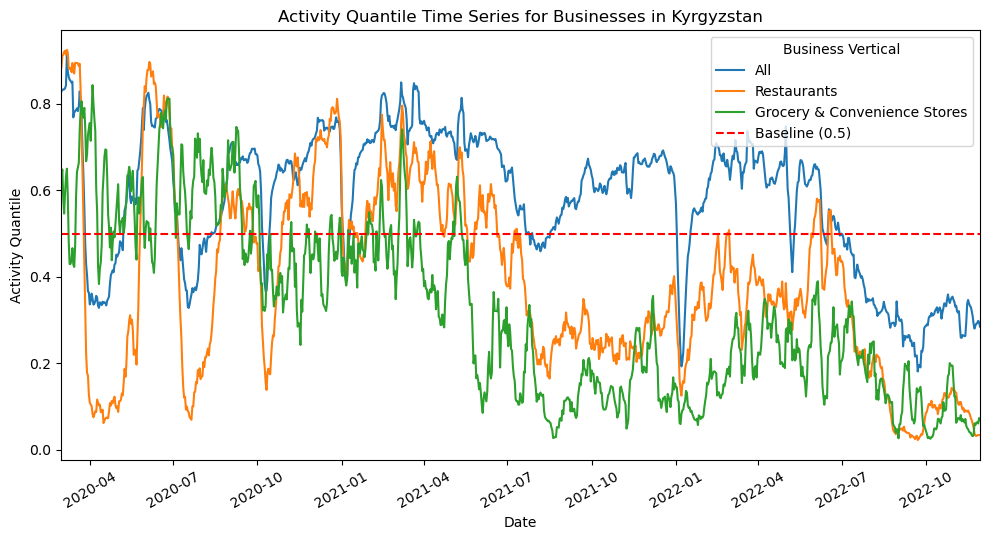

In [53]:
plt.figure(figsize=(10, 5.5))

plotData = choice_df_busvert[choice_df_busvert.gadm_name == 'Kyrgyzstan']
sns.lineplot(data=choice_df_busvert[choice_df_busvert.gadm_name == 'Kyrgyzstan'], x='ds', y='activity_quantile', hue='business_vertical', palette='tab10')

plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline (0.5)')

plt.title('Activity Quantile Time Series for Businesses in Kyrgyzstan')
plt.xlabel('Date')
plt.ylabel('Activity Quantile')
plt.xlim([choice_df_busvert.index.min(),choice_df_busvert.index.max()])
#plt.ylim([0,1])
plt.xticks(rotation=30)
plt.legend(title='Business Vertical', loc='upper right')
plt.tight_layout()
plt.show()


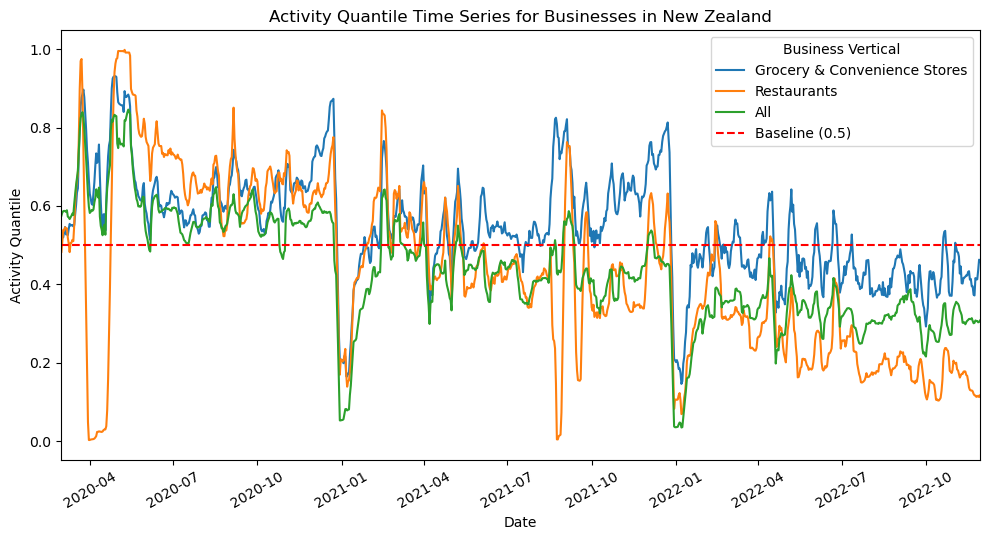

In [54]:
plt.figure(figsize=(10, 5.5))

plotData = choice_df_busvert[choice_df_busvert.gadm_name == 'New Zealand']
sns.lineplot(data=choice_df_busvert[choice_df_busvert.gadm_name == 'New Zealand'], x='ds', y='activity_quantile', hue='business_vertical', palette='tab10')

plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline (0.5)')

plt.title('Activity Quantile Time Series for Businesses in New Zealand')
plt.xlabel('Date')
plt.ylabel('Activity Quantile')
plt.xlim([choice_df_busvert.index.min(),choice_df_busvert.index.max()])
#plt.ylim([0,1])
plt.xticks(rotation=30)
plt.legend(title='Business Vertical', loc='upper right')
plt.tight_layout()
plt.show()


<Axes: xlabel='ds'>

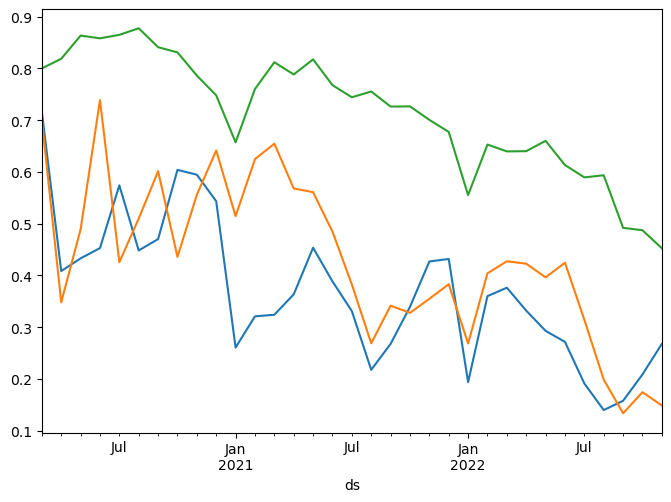

In [55]:
#choice_df_busvert[].resample('W').mean()
plt.figure(figsize=(8,5.5))
choice_df_busvert[choice_df_busvert.gadm_name=='United Kingdom'].resample('M').mean(True)['activity_quantile'].plot()
choice_df_busvert[choice_df_busvert.gadm_name=='Kyrgyzstan'].resample('M').mean(True)['activity_quantile'].plot()
choice_df_busvert[choice_df_busvert.gadm_name=='Brazil'].resample('M').mean(True)['activity_quantile'].plot()

In [56]:
choice_df_busvert.gadm_name.unique()

array(['Kyrgyzstan', 'United Kingdom', 'Brazil', 'Nigeria', 'New Zealand'],
      dtype=object)

In [57]:
choice_df_busvert.business_vertical.unique()

array(['All', 'Grocery & Convenience Stores', 'Restaurants'], dtype=object)

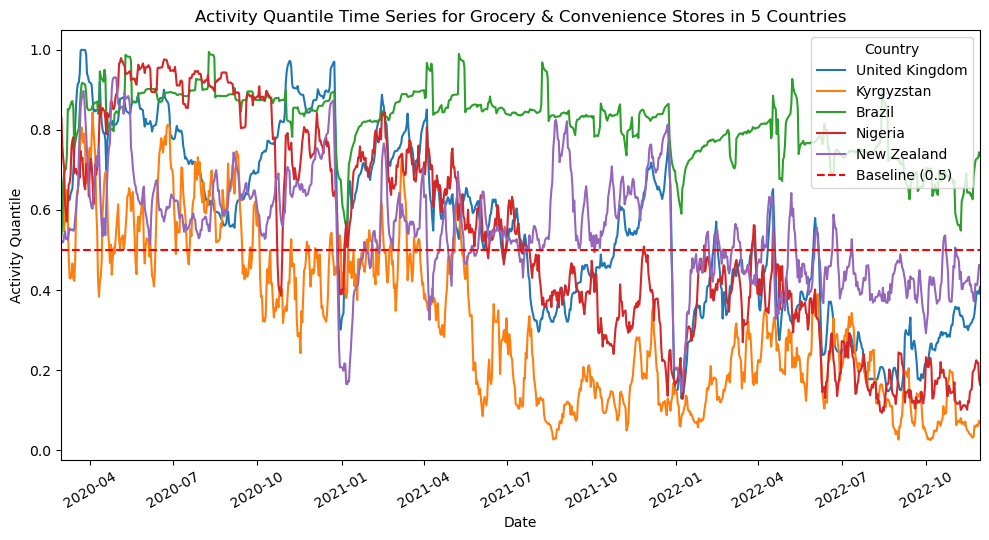

In [58]:
plt.figure(figsize=(10, 5.5))

plotData = choice_df_busvert[choice_df_busvert.business_vertical == 'Grocery & Convenience Stores']
sns.lineplot(data=plotData, x='ds', y='activity_quantile', hue='gadm_name', palette='tab10')

plt.axhline(y=0.5, color='red', linestyle='--', label='Baseline (0.5)')

plt.title('Activity Quantile Time Series for Grocery & Convenience Stores in 5 Countries')
plt.xlabel('Date')
plt.ylabel('Activity Quantile')
plt.xlim([choice_df_busvert.index.min(),choice_df_busvert.index.max()])
#plt.ylim([0,1])
plt.xticks(rotation=30)
plt.legend(title='Country', loc='upper right')
plt.tight_layout()
plt.show()

So we're interested in;
* General trend
* Seasonalily
* Cyclical movements
* Unexpected variations

Try to do this for the 5 chosen countries

1. General trend: Looks at the upward or downward movement over the longrun for that specific dataset. So you have to ask the question; *"why are we seeing this overall trend? What can be attributed to it?"* A general trend is commonly modeled by setting up the time series as **a regression against time** and other known factors as explanatory variables. The regression or trend line can be used as **a prediction of the long run movement of the time series** while the residuals left by the trend line can be further analyzed for other interesting properties such the remaining 3 listed above.
2. Seasonality: Removing the trend line from a time series results in the seasonality being shown. Though the de-trended line series has a constant mean and constant variance, it systematically departs from the trend model **in a predictable manner??** 
      * Summary: It is showing in a detrended graph and manifested as periodic deviations. 
      * Determining seasonality through EDA can be gotten by running: Run Sequence plot, Seasonal sub-series plot and Multiple box plots.
3. Cyclical changes: Looks at changes across long periods like years. The average periodicity for cyclical changes would be larger, whereas seasonal variations are observed within the year.Therefore this requires a long run plot of the time series data to look at the repetitive crests and troughs.

`Now you're in an interesting pickle. You have found out Time series data involves looking at regression and all. Coollll. Next, check out the data in the textbook. Remember that you don't want to code everything. You just want to understand what's going on here Pg21`

Now, that I have looked at the business verticals in each of my chosen countries. I would like to delve more deeply into my data and look at the seasonality. Let's have a look at the data for UK. Since we're looking at seasonality, we'll have to detrend our data.

In [59]:
ukdata = choice_df_busvert[choice_df_busvert['gadm_name'] == 'United Kingdom']

<Axes: xlabel='ds'>

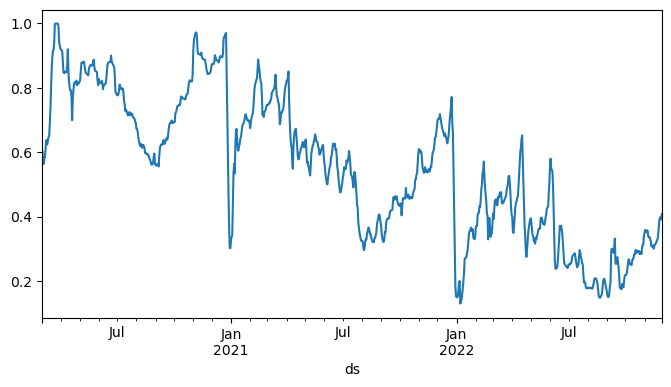

In [60]:
# GROCERIES
plt.figure(figsize=(8,4))
ukdata[ukdata['business_vertical']== 'Grocery & Convenience Stores']['activity_quantile'].plot()

<Axes: xlabel='ds'>

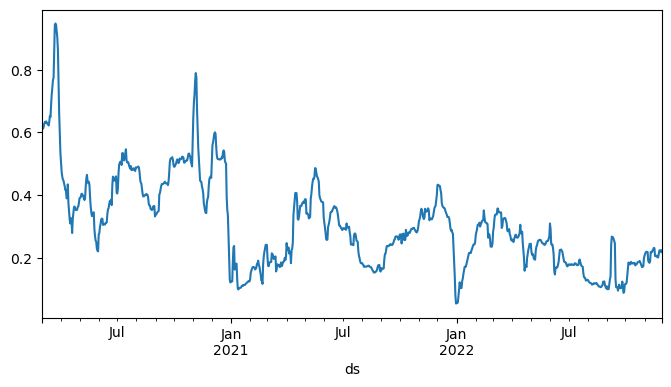

In [61]:
# for all business verticals
plt.figure(figsize=(8,4))
ukdata[ukdata['business_vertical']== 'All']['activity_quantile'].plot()

I have to detrend each plot with respect to it's business vertical. I can't just to a general detrending.

In [62]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

In [63]:
ukdata_groceries = ukdata[ukdata['business_vertical']== 'Grocery & Convenience Stores'].copy()

In [64]:
ukdata_groceries['activity_quantile'].values

array([0.60874844, 0.60120906, 0.56404381, ..., 0.39658781, 0.3906429 ,
       0.40764568])

In [65]:
scaler = StandardScaler()

# create your x values to represent your days since you can't use the datetime format in LinearRegression
X = np.arange(ukdata_groceries.shape[0]).reshape([-1,1])

# normalize your X
scaler.fit(X) 
norm_X = scaler.transform(X)

In [66]:
trend_model = LinearRegression()
trend_model.fit(norm_X, ukdata_groceries['activity_quantile'].values)

LinearRegression()

In [67]:
print('Trend model coefficient= {:.5f} and intercept= {:.5f}'.format(trend_model.coef_[0],trend_model.intercept_))

Trend model coefficient= -0.18556 and intercept= 0.55230


Now with our trend model, we can get the residuals

In [68]:
pred_vals = trend_model.predict(norm_X)

<Axes: xlabel='ds'>

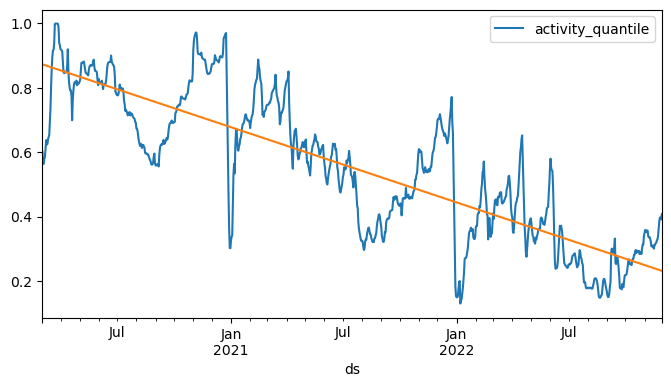

In [69]:
plt.figure(figsize=(8,4))
ukdata[ukdata['business_vertical']== 'Grocery & Convenience Stores']['activity_quantile'].plot()
sns.lineplot(y=pred_vals, x=ukdata_groceries.index)

In [70]:
residuals = ukdata_groceries['activity_quantile'].values - pred_vals

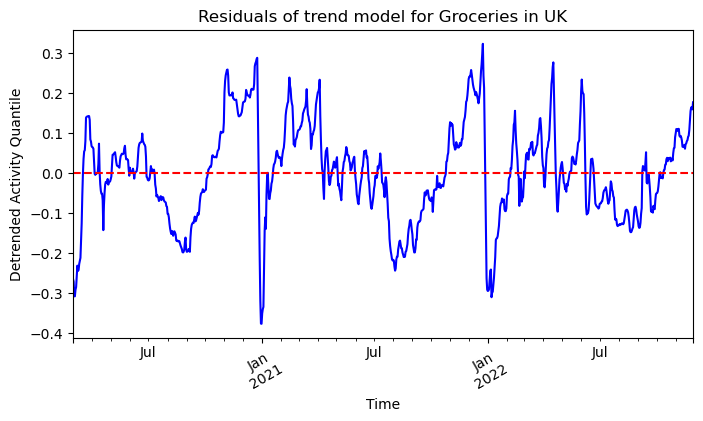

In [71]:
plt.figure(figsize=(8, 4))
pd.Series(data=residuals, index=ukdata_groceries.index).plot(color='b')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of trend model for Groceries in UK')
plt.xlabel('Time')
plt.ylabel('Detrended Activity Quantile')
plt.xticks(rotation=30)
plt.show()

After detrending, residuals represent variations not explained by the regression line. In this context, residuals reflect the short-term fluctuations or irregularities in the data that are not associated with the long-term trend. Values above 0 indicate that the observed activity quantile is higher than what the trend line predicts for that specific time point. It suggests periods of relatively higher activity compared to the expected trend. While values below 0 indicate that the observed activity quantile is lower than the predicted value by the trend line. It suggests periods of relatively lower activity compared to the expected trend.

In [72]:
residuals

array([-0.26463976, -0.27153888, -0.30806387, ...,  0.16409407,
        0.1587894 ,  0.17643244])

In [73]:
ukdata_groceries['residuals'] = residuals

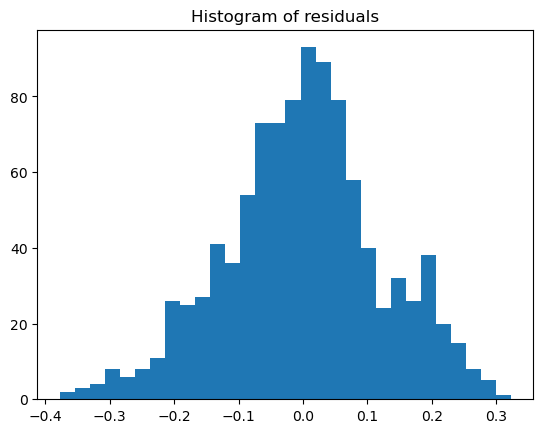

In [74]:
plt.hist(residuals,30)
plt.title('Histogram of residuals');

In [75]:
# add quarter, month_name, and day of the week name to df
ukdata_groceries['quarter'] = np.array(ukdata_groceries.reset_index().ds.dt.quarter)
ukdata_groceries['month'] = np.array(ukdata_groceries.reset_index().ds.dt.month) 
ukdata_groceries['day_of_week'] = np.array(ukdata_groceries.reset_index().ds.dt.day_of_week) #0 is Monday, 6 is Sunday

Multiple box plots to visualize central tendency and dispersion of seasonal sub series

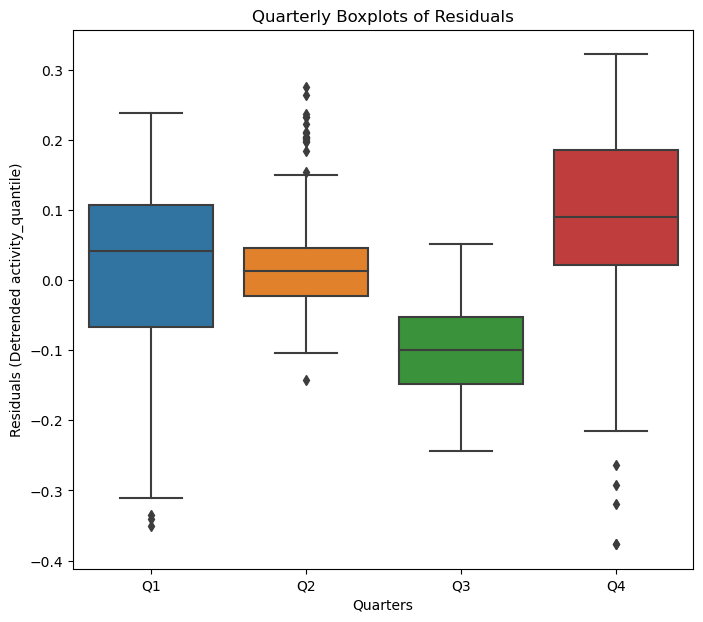

In [76]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=ukdata_groceries, y='residuals', x='quarter', palette='tab10')
plt.title('Quarterly Boxplots of Residuals')
plt.xlabel('Quarters')
plt.xticks(ticks=[0,1,2,3], labels=['Q1','Q2','Q3','Q4'])
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

Use this to help in the interpretation of your plots;

* Positive Residuals: Higher activity quantile residuals during certain periods might suggest that businesses were performing better or showing more activity than the anticipated baseline. These deviations could indicate periods of increased business activity that weren't predicted by the baseline.

* Negative Residuals: Lower activity quantile residuals might imply that businesses were underperforming or displaying less activity than expected during certain periods. These deviations might represent declines in performance or unexpected drops in business activity that were not accounted for by the baseline.

These residual patterns, when observed over different periods (such as quarterly, monthly, or daily), could reveal trends or anomalies in business activity that weren't initially apparent. Analyzing these residuals across various timeframes can help identify specific periods where businesses were significantly impacted by the pandemic, showing patterns of resilience or vulnerability.

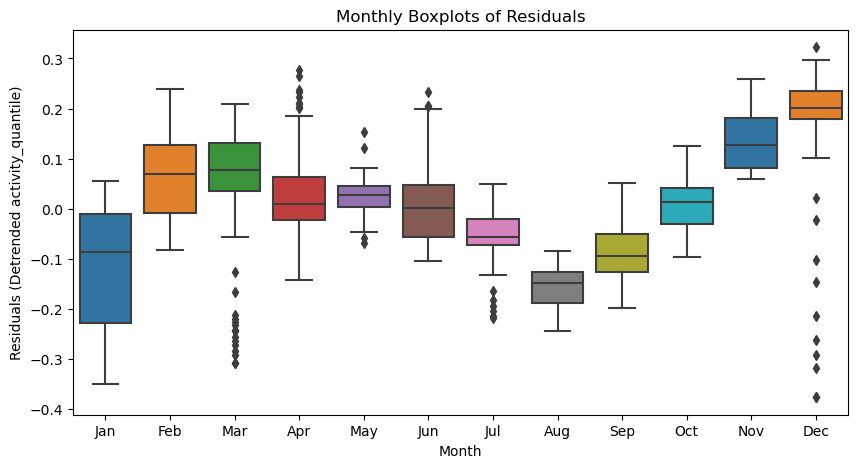

In [77]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=ukdata_groceries, y='residuals', x='month', palette='tab10')
plt.title('Monthly Boxplots of Residuals')
plt.xlabel('Month')
plt.xticks(ticks=np.concatenate([np.arange(2,12,1),[0,1]]), 
           labels=ukdata_groceries.index.strftime('%b').unique())
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

Why so many points per month? We are looking at a group of points together and each point represents a particular day. So the outliers you see in December are the days that have poor performance. March also has a large amount of poor performers.

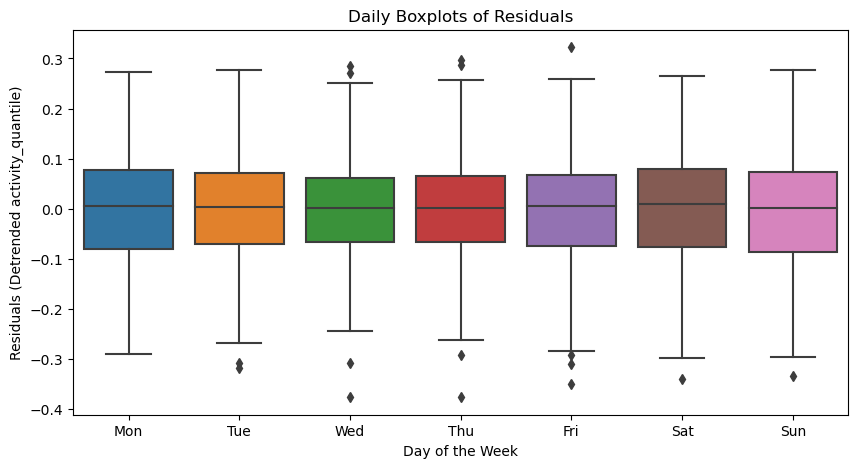

In [78]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=ukdata_groceries, y='residuals', x='day_of_week', palette='tab10')
plt.title('Daily Boxplots of Residuals')
plt.xlabel('Day of the Week')
plt.xticks(ticks=np.concatenate([[6],np.arange(0,6,1)]), labels=ukdata_groceries.index.strftime('%a').unique())
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

#### Next, I'll do the same for Restaurants and 'All' category.

In [79]:
ukdata.business_vertical.unique()

array(['Grocery & Convenience Stores', 'All', 'Restaurants'], dtype=object)

In [80]:
ukdata_rest = ukdata[ukdata['business_vertical']== 'Restaurants'].copy()

In [81]:
ukdata_rest['activity_quantile'].values

array([0.65950153, 0.62847503, 0.59933954, ..., 0.3210762 , 0.29522864,
       0.34365234])

In [82]:
scaler = StandardScaler()

# create your x values to represent your days since you can't use the datetime format in LinearRegression
X = np.arange(ukdata_rest.shape[0]).reshape([-1,1])

# normalize your X
scaler.fit(X) 
norm_X = scaler.transform(X)

In [83]:
trend_model = LinearRegression()
trend_model.fit(norm_X, ukdata_rest['activity_quantile'].values)

LinearRegression()

In [84]:
print('Trend model coefficient= {:.5f} and intercept= {:.5f}'.format(trend_model.coef_[0],trend_model.intercept_))

Trend model coefficient= -0.02648 and intercept= 0.24888


Now with our trend model, we can get the residuals

In [85]:
pred_vals = trend_model.predict(norm_X)

<Axes: xlabel='ds'>

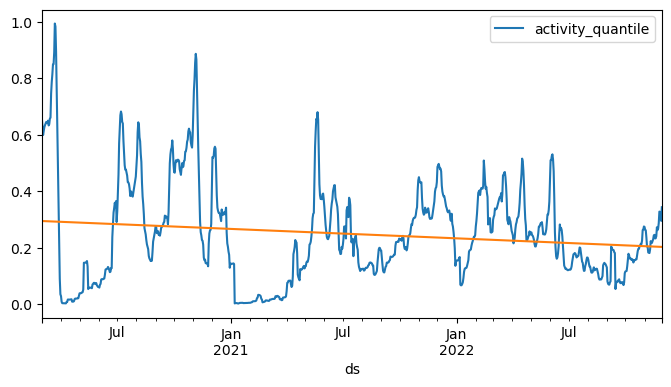

In [86]:
plt.figure(figsize=(8,4))
ukdata[ukdata['business_vertical']== 'Restaurants']['activity_quantile'].plot()
sns.lineplot(y=pred_vals, x=ukdata_rest.index)

In [87]:
residuals = ukdata_rest['activity_quantile'].values - pred_vals

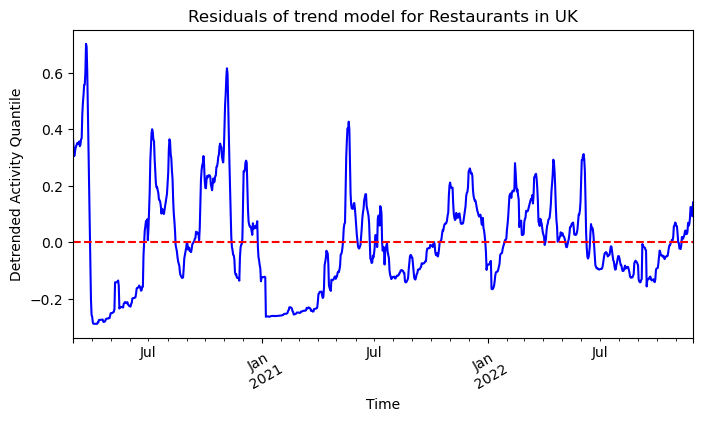

In [88]:
plt.figure(figsize=(8, 4))
pd.Series(data=residuals, index=ukdata_rest.index).plot(color='b')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of trend model for Restaurants in UK')
plt.xlabel('Time')
plt.ylabel('Detrended Activity Quantile')
plt.xticks(rotation=30)
plt.show()

After detrending, residuals represent variations not explained by the regression line. In this context, residuals reflect the short-term fluctuations or irregularities in the data that are not associated with the long-term trend. Values above 0 indicate that the observed activity quantile is higher than what the trend line predicts for that specific time point. It suggests periods of relatively higher activity compared to the expected trend. While values below 0 indicate that the observed activity quantile is lower than the predicted value by the trend line. It suggests periods of relatively lower activity compared to the expected trend.

In [89]:
residuals

array([0.36479631, 0.33386119, 0.30481708, ..., 0.11784058, 0.0920844 ,
       0.14059947])

In [90]:
ukdata_rest['residuals'] = residuals

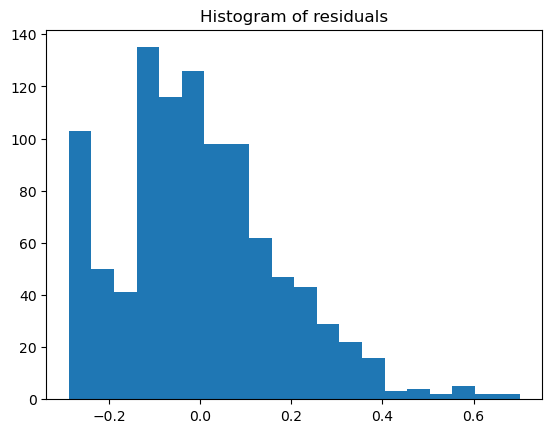

In [91]:
plt.hist(residuals,20)
plt.title('Histogram of residuals');

In [92]:
# add quarter, month_name, and day of the week name to df
ukdata_rest['quarter'] = np.array(ukdata_rest.reset_index().ds.dt.quarter)
ukdata_rest['month'] = np.array(ukdata_rest.reset_index().ds.dt.month) 
ukdata_rest['day_of_week'] = np.array(ukdata_rest.reset_index().ds.dt.day_of_week) #0 is Monday, 6 is Sunday

Multiple box plots to visualize central tendency and dispersion of seasonal sub series

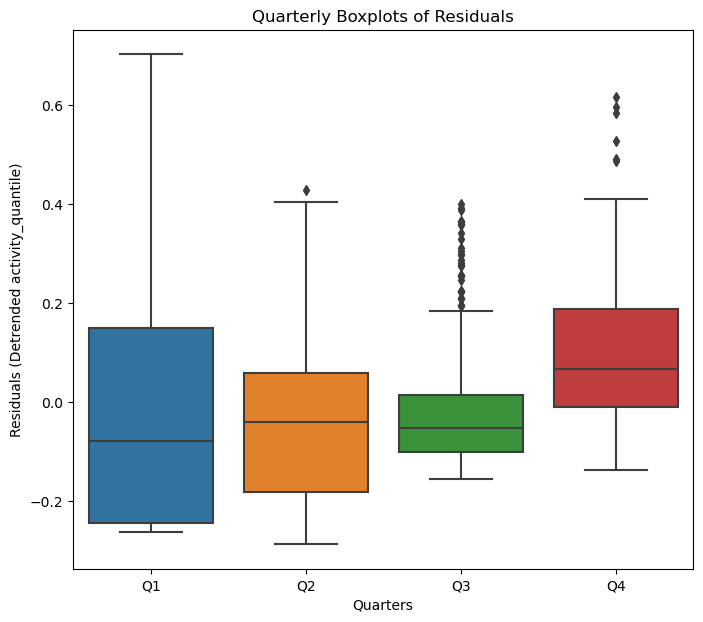

In [93]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=ukdata_rest, y='residuals', x='quarter', palette='tab10')
plt.title('Quarterly Boxplots of Residuals')
plt.xlabel('Quarters')
plt.xticks(ticks=[0,1,2,3], labels=['Q1','Q2','Q3','Q4'])
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

Use this to help in the interpretation of your plots;

* Positive Residuals: Higher activity quantile residuals during certain periods might suggest that businesses were performing better or showing more activity than the anticipated baseline. These deviations could indicate periods of increased business activity that weren't predicted by the baseline.

* Negative Residuals: Lower activity quantile residuals might imply that businesses were underperforming or displaying less activity than expected during certain periods. These deviations might represent declines in performance or unexpected drops in business activity that were not accounted for by the baseline.

These residual patterns, when observed over different periods (such as quarterly, monthly, or daily), could reveal trends or anomalies in business activity that weren't initially apparent. Analyzing these residuals across various timeframes can help identify specific periods where businesses were significantly impacted by the pandemic, showing patterns of resilience or vulnerability.

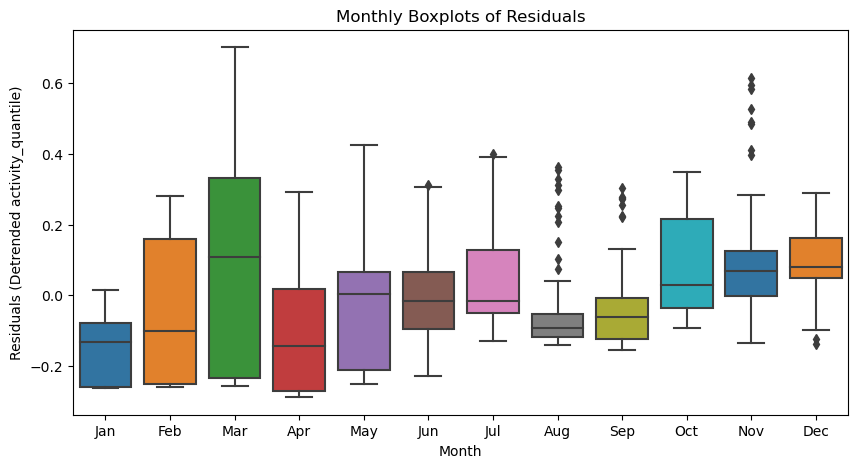

In [94]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=ukdata_rest, y='residuals', x='month', palette='tab10')
plt.title('Monthly Boxplots of Residuals')
plt.xlabel('Month')
plt.xticks(ticks=np.concatenate([np.arange(2,12,1),[0,1]]), 
           labels=ukdata_rest.index.strftime('%b').unique())
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

Why so many points per month? We are looking at a group of points together and each point represents a particular day. So the outliers you see in December are the days that have poor performance. March also has a large amount of poor performers.

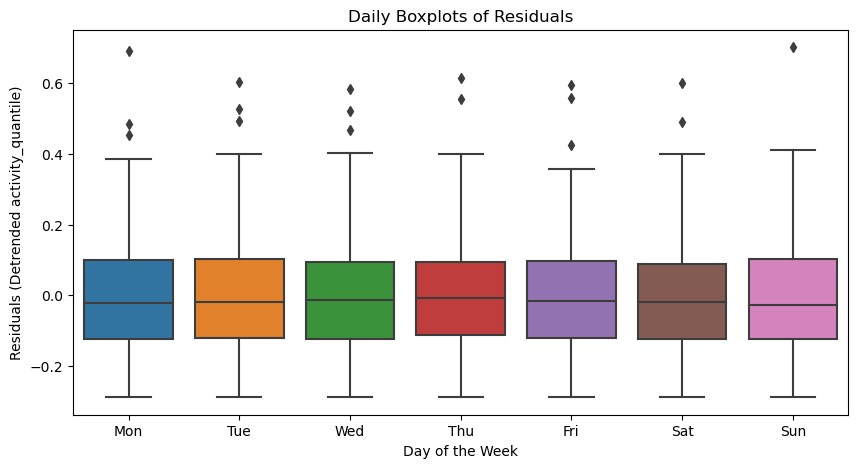

In [95]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=ukdata_rest, y='residuals', x='day_of_week', palette='tab10')
plt.title('Daily Boxplots of Residuals')
plt.xlabel('Day of the Week')
plt.xticks(ticks=np.concatenate([[6],np.arange(0,6,1)]), labels=ukdata_rest.index.strftime('%a').unique())
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

In [96]:
ukdata.business_vertical.unique()

array(['Grocery & Convenience Stores', 'All', 'Restaurants'], dtype=object)

In [97]:
ukdata_All = ukdata[ukdata['business_vertical']== 'All'].copy()

In [98]:
ukdata_All['activity_quantile'].values

array([0.62284328, 0.62149787, 0.61244111, ..., 0.22428237, 0.21798394,
       0.22343462])

In [99]:
scaler = StandardScaler()

# create your x values to represent your days since you can't use the datetime format in LinearRegression
X = np.arange(ukdata_All.shape[0]).reshape([-1,1])

# normalize your X
scaler.fit(X) 
norm_X = scaler.transform(X)

In [100]:
trend_model = LinearRegression()
trend_model.fit(norm_X, ukdata_All['activity_quantile'].values)

LinearRegression()

In [101]:
print('Trend model coefficient= {:.5f} and intercept= {:.5f}'.format(trend_model.coef_[0],trend_model.intercept_))

Trend model coefficient= -0.09522 and intercept= 0.30526


Now with our trend model, we can get the residuals

In [102]:
pred_vals = trend_model.predict(norm_X)

<Axes: xlabel='ds'>

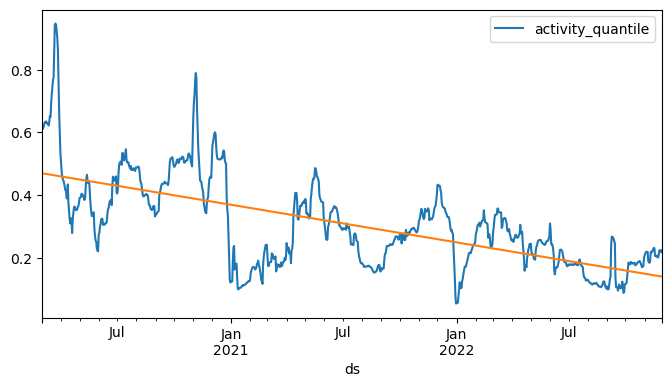

In [103]:
plt.figure(figsize=(8,4))
ukdata[ukdata['business_vertical']== 'All']['activity_quantile'].plot()
sns.lineplot(y=pred_vals, x=ukdata_All.index)

In [104]:
residuals = ukdata_All['activity_quantile'].values - pred_vals

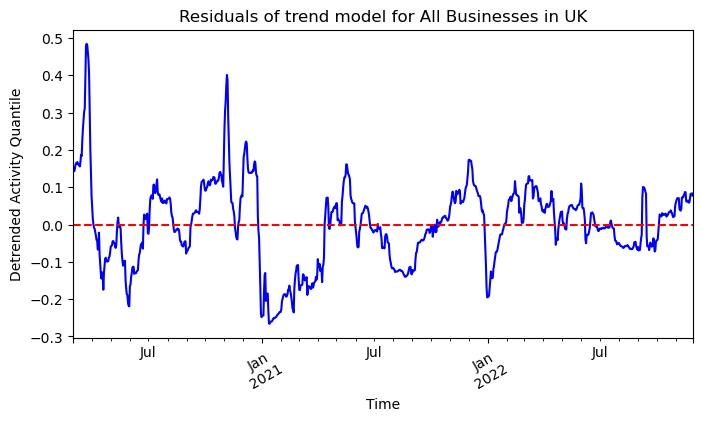

In [105]:
plt.figure(figsize=(8, 4))
pd.Series(data=residuals, index=ukdata_All.index).plot(color='b')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals of trend model for All Businesses in UK')
plt.xlabel('Time')
plt.ylabel('Detrended Activity Quantile')
plt.xticks(rotation=30)
plt.show()

After detrending, residuals represent variations not explained by the regression line. In this context, residuals reflect the short-term fluctuations or irregularities in the data that are not associated with the long-term trend. Values above 0 indicate that the observed activity quantile is higher than what the trend line predicts for that specific time point. It suggests periods of relatively higher activity compared to the expected trend. While values below 0 indicate that the observed activity quantile is lower than the predicted value by the trend line. It suggests periods of relatively lower activity compared to the expected trend.

In [106]:
residuals

array([0.15281625, 0.15179938, 0.14307116, ..., 0.08312329, 0.0771534 ,
       0.08293262])

In [107]:
ukdata_All['residuals'] = residuals

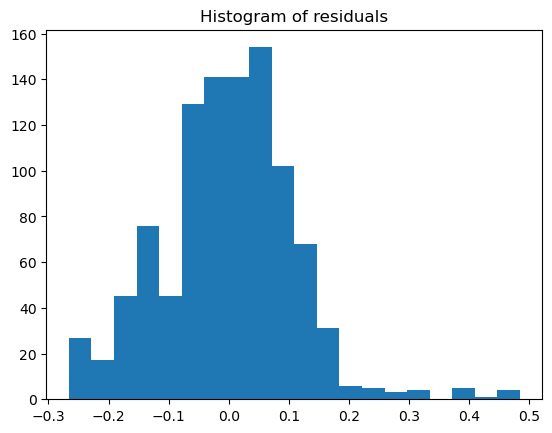

In [108]:
plt.hist(residuals,20)
plt.title('Histogram of residuals');

In [109]:
# add quarter, month_name, and day of the week name to df
ukdata_All['quarter'] = np.array(ukdata_All.reset_index().ds.dt.quarter)
ukdata_All['month'] = np.array(ukdata_All.reset_index().ds.dt.month) 
ukdata_All['day_of_week'] = np.array(ukdata_All.reset_index().ds.dt.day_of_week) #0 is Monday, 6 is Sunday

Multiple box plots to visualize central tendency and dispersion of seasonal sub series

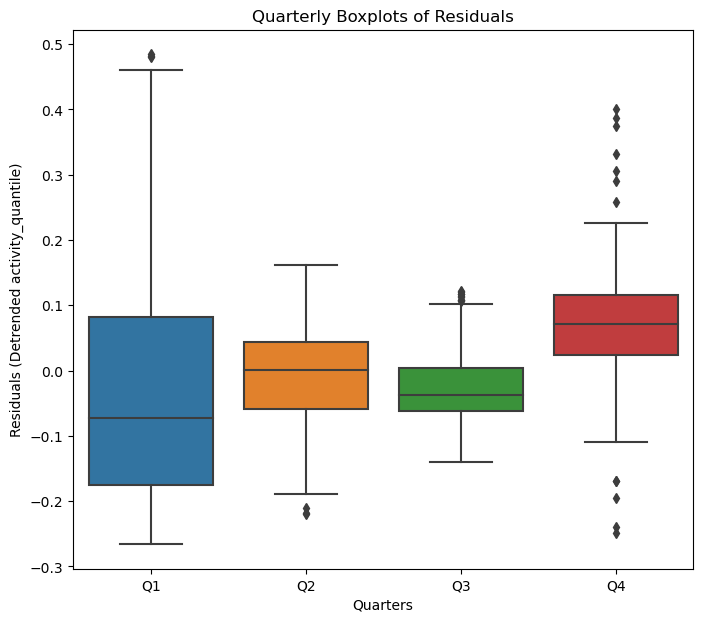

In [110]:
plt.figure(figsize=(8, 7))
sns.boxplot(data=ukdata_All, y='residuals', x='quarter', palette='tab10')
plt.title('Quarterly Boxplots of Residuals')
plt.xlabel('Quarters')
plt.xticks(ticks=[0,1,2,3], labels=['Q1','Q2','Q3','Q4'])
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

Use this to help in the interpretation of your plots;

* Positive Residuals: Higher activity quantile residuals during certain periods might suggest that businesses were performing better or showing more activity than the anticipated baseline. These deviations could indicate periods of increased business activity that weren't predicted by the baseline.

* Negative Residuals: Lower activity quantile residuals might imply that businesses were underperforming or displaying less activity than expected during certain periods. These deviations might represent declines in performance or unexpected drops in business activity that were not accounted for by the baseline.

These residual patterns, when observed over different periods (such as quarterly, monthly, or daily), could reveal trends or anomalies in business activity that weren't initially apparent. Analyzing these residuals across various timeframes can help identify specific periods where businesses were significantly impacted by the pandemic, showing patterns of resilience or vulnerability.

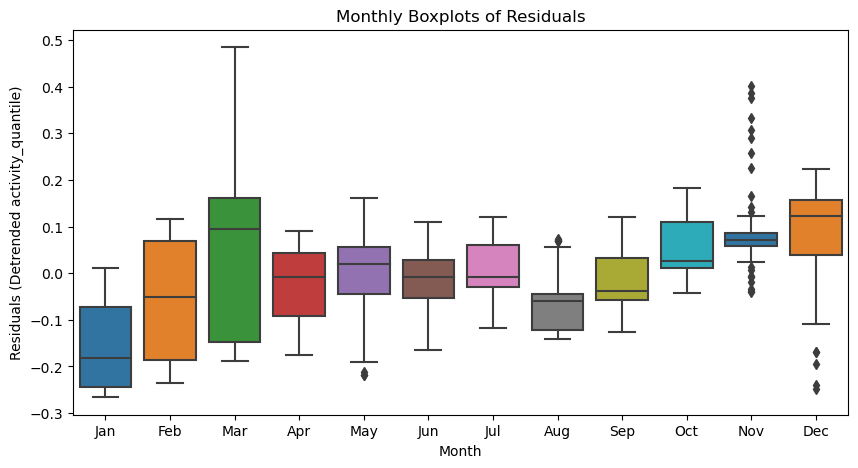

In [111]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=ukdata_All, y='residuals', x='month', palette='tab10')
plt.title('Monthly Boxplots of Residuals')
plt.xlabel('Month')
plt.xticks(ticks=np.concatenate([np.arange(2,12,1),[0,1]]), 
           labels=ukdata_All.index.strftime('%b').unique())
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

Why so many points per month? We are looking at a group of points together and each point represents a particular day. So the outliers you see in December are the days that have poor performance. March also has a large amount of poor performers.

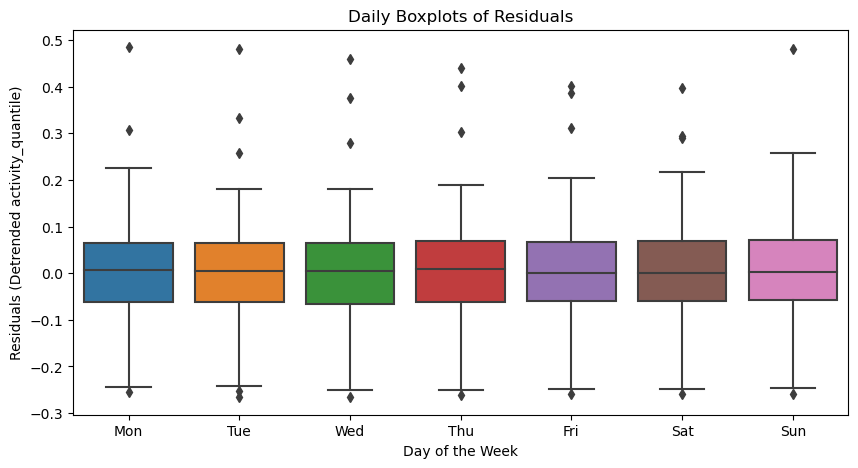

In [112]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=ukdata_All, y='residuals', x='day_of_week', palette='tab10')
plt.title('Daily Boxplots of Residuals')
plt.xlabel('Day of the Week')
plt.xticks(ticks=np.concatenate([[6],np.arange(0,6,1)]), labels=ukdata_All.index.strftime('%a').unique())
plt.ylabel('Residuals (Detrended activity_quantile)')
plt.show()

#### Q6: Please choose two days and visualise different countries/states (depending on the gadm_level of the dataset) with the business level (preferably using colormaps), in those two days. Please refer to https://gadm.org/ for more information.
Let's see which dates would be of interest to us.

In [113]:
#df.set_index('ds', inplace=True)
#df.reset_index(inplace=True)

In [114]:
df.groupby('ds')['activity_quantile'].mean().loc['December 2020':'February 2021']

ds
2020-12-01    0.540135
2020-12-02    0.537707
2020-12-03    0.536141
2020-12-04    0.538959
2020-12-05    0.542310
                ...   
2021-02-24    0.445039
2021-02-25    0.446504
2021-02-26    0.448850
2021-02-27    0.449502
2021-02-28    0.452031
Name: activity_quantile, Length: 90, dtype: float64

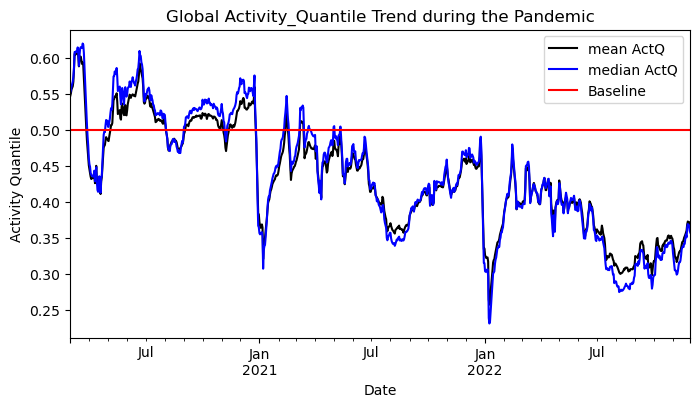

In [115]:
plt.figure(figsize=(8,4))
df.groupby('ds')['activity_quantile'].mean().plot(color='black',label='mean ActQ')
df.groupby('ds')['activity_quantile'].median().plot(color='blue',label='median ActQ')
plt.axhline(y=0.5,color='red', label='Baseline')
plt.title('Global Activity_Quantile Trend during the Pandemic')
plt.legend()
plt.ylabel('Activity Quantile')
plt.xlabel('Date');

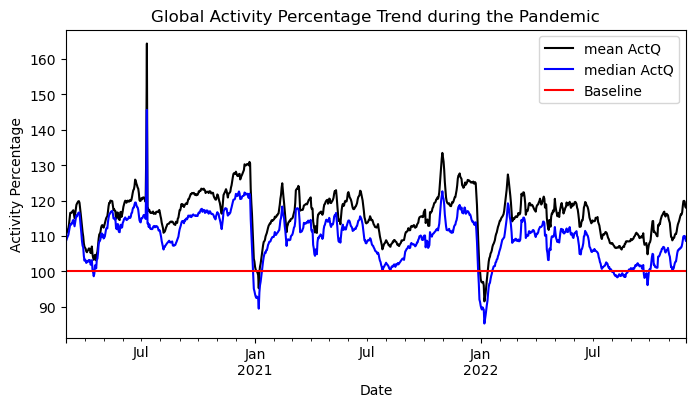

In [116]:
plt.figure(figsize=(8,4))
df.groupby('ds')['activity_percentage'].mean().plot(color='black',label='mean ActQ')
df.groupby('ds')['activity_percentage'].median().plot(color='blue',label='median ActQ')
plt.axhline(y=100,color='red', label='Baseline')
plt.title('Global Activity Percentage Trend during the Pandemic')
plt.legend()
plt.ylabel('Activity Percentage')
plt.xlabel('Date');

Let's have a look at these values at January. They seem interesting.

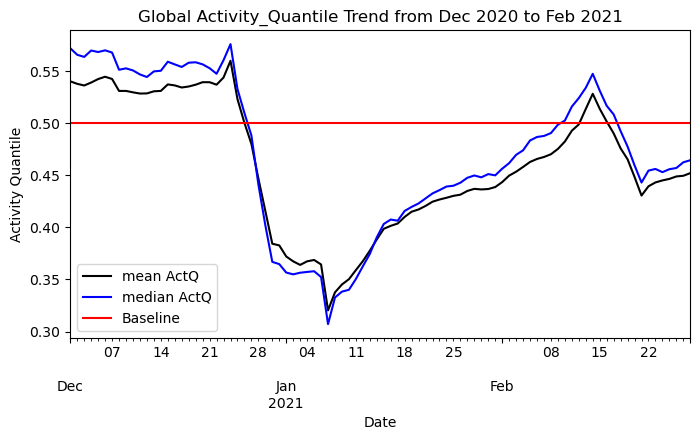

In [117]:
plt.figure(figsize=(8,4))
df.groupby('ds')['activity_quantile'].mean().loc['December 2020':'February 2021'].plot(color='black',label='mean ActQ')
df.groupby('ds')['activity_quantile'].median().loc['December 2020':'February 2021'].plot(color='blue',label='median ActQ')
plt.axhline(y=0.5,color='red', label='Baseline')
plt.title('Global Activity_Quantile Trend from Dec 2020 to Feb 2021')
plt.legend()
plt.ylabel('Activity Quantile')
plt.xlabel('Date');

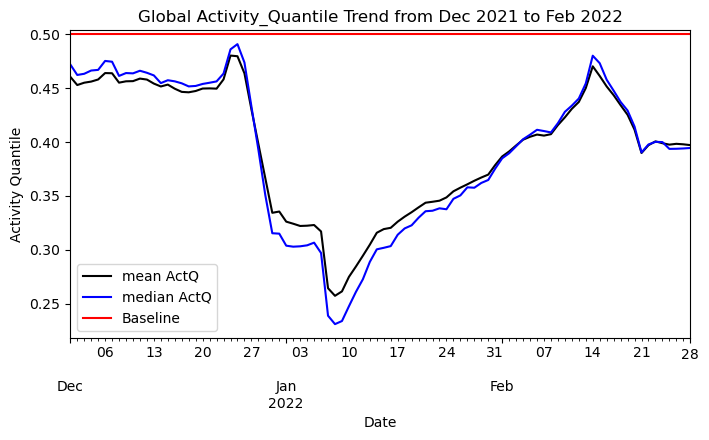

In [118]:
plt.figure(figsize=(8,4))
df.groupby('ds')['activity_quantile'].mean().loc['December 2021':'February 2022'].plot(color='black',label='mean ActQ')
df.groupby('ds')['activity_quantile'].median().loc['December 2021':'February 2022'].plot(color='blue',label='median ActQ')
plt.axhline(y=0.5,color='red', label='Baseline')
plt.title('Global Activity_Quantile Trend from Dec 2021 to Feb 2022')
plt.legend()
plt.ylabel('Activity Quantile')
plt.xlabel('Date');

So let's look at January 7th 2021 and January 8th 2022. Those dates seemed to have the lowest activity quantiles throughout the pandemic.

In [119]:
#!pip install geopandas

In [120]:
import geopandas as gpd
import fsspec

In [121]:
df.set_index('ds', inplace=True)

In [122]:
gadmPlotData_firstday = df.loc['January 7th 2021']
gadmPlotData_secondday = df.loc['January 8th 2022']

Some countries are missing, so I'll have to hash them out.

In [123]:
# Load the geographical data for countries/states (gadm_level dependent)
url = "https://www.naturalearthdata.com/http//www.naturalearthdata.com/" \
     "download/110m/cultural/ne_110m_admin_0_countries.zip"
    
with fsspec.open(f"simplecache::{url}") as file:
    world = gpd.read_file(file)

Let's see the countries that won't match if we do a merge

In [124]:
# Names in df that aren't in world data
np.array(np.sort(list(set(df.gadm_name).difference(set(world.SOVEREIGNT)))))

array(['Akrotiri and Dhekelia', 'American Samoa', 'Andorra', 'Anguilla',
       'Antigua and Barbuda', 'Aruba', 'Bahamas', 'Bahrain', 'Barbados',
       'Bermuda', 'Bonaire, Sint Eustatius and Saba',
       'British Virgin Islands', 'Cape Verde', 'Caspian Sea',
       'Cayman Islands', 'Christmas Island', 'Comoros', 'Cook Islands',
       'Curaçao', 'Czech Republic', "Côte d'Ivoire", 'Dominica',
       'Falkland Islands', 'Faroe Islands', 'French Guiana',
       'French Polynesia', 'Gibraltar', 'Greenland', 'Grenada',
       'Guadeloupe', 'Guam', 'Guernsey', 'Hong Kong', 'Isle of Man',
       'Jersey', 'Kiribati', 'Liechtenstein', 'Macao', 'Macedonia',
       'Maldives', 'Malta', 'Marshall Islands', 'Martinique', 'Mauritius',
       'Mayotte', 'Micronesia', 'Monaco', 'Montserrat', 'New Caledonia',
       'Niue', 'Norfolk Island', 'Northern Mariana Islands', 'Palau',
       'Puerto Rico', 'Republic of Congo', 'Reunion', 'Saint Helena',
       'Saint Kitts and Nevis', 'Saint Lucia',
    

In [125]:
# names in world data that aren't in df
np.array(np.sort(list(set(world.SOVEREIGNT).difference(set(df.gadm_name)))))

array(['Afghanistan', 'Antarctica', 'Azerbaijan', 'China', 'Cuba',
       'Czechia', 'East Timor', 'Iran', 'Iraq', 'Ivory Coast', 'Kosovo',
       'Montenegro', 'Morocco', 'Myanmar', 'North Korea',
       'North Macedonia', 'Republic of Serbia', 'Republic of the Congo',
       'Russia', 'Somalia', 'Somaliland', 'Sudan', 'Syria', 'The Bahamas',
       'Ukraine', 'United Republic of Tanzania',
       'United States of America', 'Venezuela', 'Western Sahara', 'Yemen',
       'eSwatini'], dtype='<U27')

In [126]:
np.sort(world.SOV_A3.unique())

array(['AFG', 'AGO', 'ALB', 'ARE', 'ARG', 'ARM', 'ATA', 'AU1', 'AUT',
       'AZE', 'BDI', 'BEL', 'BEN', 'BFA', 'BGD', 'BGR', 'BHS', 'BIH',
       'BLR', 'BLZ', 'BOL', 'BRA', 'BRN', 'BTN', 'BWA', 'CAF', 'CAN',
       'CH1', 'CHE', 'CHL', 'CIV', 'CMR', 'COD', 'COG', 'COL', 'CRI',
       'CU1', 'CYN', 'CYP', 'CZE', 'DEU', 'DJI', 'DN1', 'DOM', 'DZA',
       'ECU', 'EGY', 'ERI', 'ESP', 'EST', 'ETH', 'FI1', 'FJI', 'FR1',
       'GAB', 'GB1', 'GEO', 'GHA', 'GIN', 'GMB', 'GNB', 'GNQ', 'GRC',
       'GTM', 'GUY', 'HND', 'HRV', 'HTI', 'HUN', 'IDN', 'IND', 'IRL',
       'IRN', 'IRQ', 'IS1', 'ISL', 'ITA', 'JAM', 'JOR', 'JPN', 'KA1',
       'KEN', 'KGZ', 'KHM', 'KOR', 'KOS', 'KWT', 'LAO', 'LBN', 'LBR',
       'LBY', 'LKA', 'LSO', 'LTU', 'LUX', 'LVA', 'MAR', 'MDA', 'MDG',
       'MEX', 'MKD', 'MLI', 'MMR', 'MNE', 'MNG', 'MOZ', 'MRT', 'MWI',
       'MYS', 'NAM', 'NER', 'NGA', 'NIC', 'NL1', 'NOR', 'NPL', 'NZ1',
       'OMN', 'PAK', 'PAN', 'PER', 'PHL', 'PNG', 'POL', 'PRK', 'PRT',
       'PRY', 'QAT',

In [127]:
# most of the issue has to do with the ones that have '1' at the end of their 3 letter designation
confusing_SOVA3 = np.array([i for i in np.sort(world.SOV_A3.unique()) if i[-1] == "1"])
confusing_SOVA3

array(['AU1', 'CH1', 'CU1', 'DN1', 'FI1', 'FR1', 'GB1', 'IS1', 'KA1',
       'NL1', 'NZ1', 'US1'], dtype='<U3')

In [128]:
world.query("SOV_A3 in @confusing_SOVA3").iloc[:,0:11]

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,ADM0_A3
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,USA
5,Admin-0 country,1,3,Kazakhstan,KA1,1,1,Sovereignty,1,Kazakhstan,KAZ
20,Admin-0 country,1,5,United Kingdom,GB1,1,2,Disputed,1,Falkland Islands,FLK
22,Admin-0 country,1,3,Denmark,DN1,1,2,Country,1,Greenland,GRL
23,Admin-0 country,3,6,France,FR1,1,2,Dependency,1,French Southern and Antarctic Lands,ATF
43,Admin-0 country,1,2,France,FR1,1,2,Country,1,France,FRA
45,Admin-0 country,1,5,United States of America,US1,1,2,Dependency,1,Puerto Rico,PRI
47,Admin-0 country,1,3,Cuba,CU1,1,1,Sovereignty,1,Cuba,CUB
76,Admin-0 country,1,4,Israel,IS1,1,2,Disputed,1,Israel,ISR
79,Admin-0 country,1,5,Israel,IS1,1,2,Indeterminate,1,Palestine,PSX


Interesting. This means that I'll have to merge on `ADM0_A3` and not `SOV_A3`.

In [129]:
world.columns[:13]

Index(['featurecla', 'scalerank', 'LABELRANK', 'SOVEREIGNT', 'SOV_A3',
       'ADM0_DIF', 'LEVEL', 'TYPE', 'TLC', 'ADMIN', 'ADM0_A3', 'GEOU_DIF',
       'GEOUNIT'],
      dtype='object')

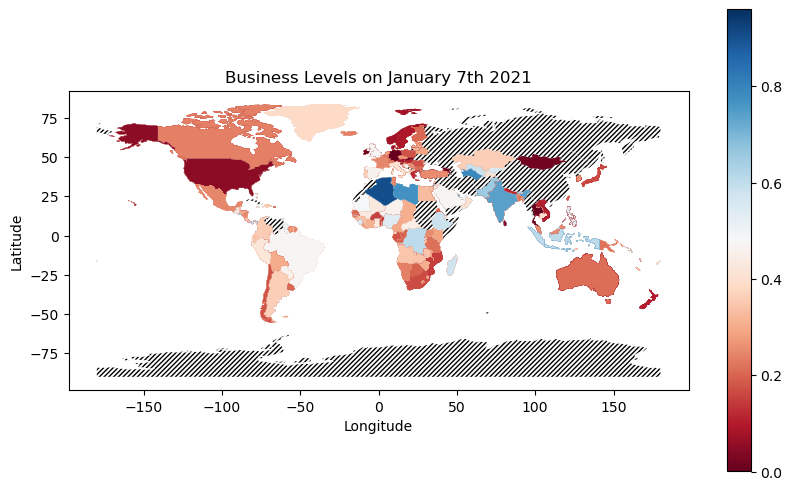

In [130]:

# Merge your dataset with the geographical data
merged_data = world.merge(gadmPlotData_firstday.reset_index(), how='left', left_on='ADM0_A3', right_on='gadm_id')

# Create a new column to identify missing data
merged_data['missing_data'] = merged_data['activity_quantile'].isnull()

# Plot the map with cross-hatching for missing data
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='activity_quantile', ax=ax, legend=True, cmap='RdBu',
                 edgecolor=None, missing_kwds={'color': 'white', 'hatch': '///////'})

plt.title('Business Levels on January 7th 2021')  # Set title
plt.xlabel('Longitude')  # Add X-axis label if needed
plt.ylabel('Latitude')  # Add Y-axis label if needed
plt.show()


In [131]:
np.array(list(set(merged_data[merged_data.activity_quantile.isna()].SOVEREIGNT)))

array(['Myanmar', 'Somaliland', 'Yemen', 'Venezuela', 'Sudan', 'Iraq',
       'Morocco', 'China', 'France', 'Somalia', 'Antarctica', 'Israel',
       'Western Sahara', 'North Korea', 'Syria', 'Kosovo',
       'Northern Cyprus', 'Iran', 'South Sudan', 'Cuba', 'Azerbaijan',
       'Russia', 'Afghanistan', 'Ukraine', 'Montenegro'], dtype='<U15')

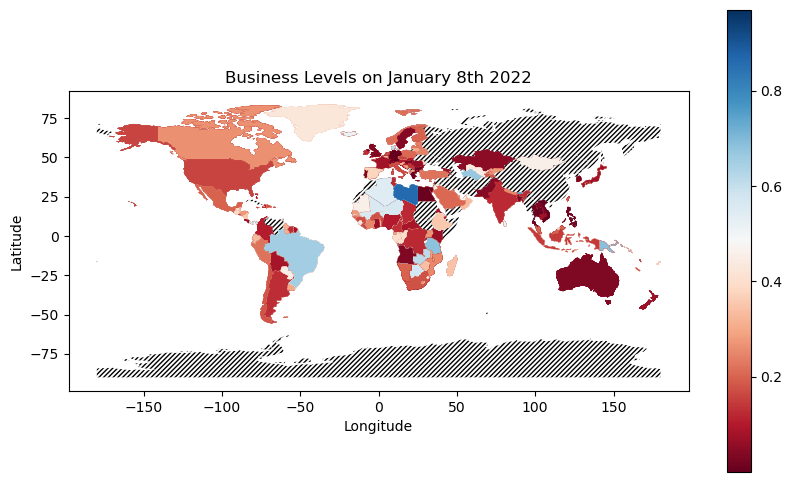

In [132]:
# Merge your dataset with the geographical data
merged_data = world.merge(gadmPlotData_secondday.reset_index(), how='left', left_on='ADM0_A3', right_on='gadm_id')

# Create a new column to identify missing data
merged_data['missing_data'] = merged_data['activity_quantile'].isnull()

# Plot the map with cross-hatching for missing data
fig, ax = plt.subplots(figsize=(10, 6))
merged_data.plot(column='activity_quantile', ax=ax, legend=True, cmap='RdBu',
                 edgecolor=None, missing_kwds={'color': 'white', 'hatch': '///////'})

plt.title('Business Levels on January 8th 2022')  # Set title
plt.xlabel('Longitude')  # Add X-axis label if needed
plt.ylabel('Latitude')  # Add Y-axis label if needed
plt.show()


<span style="color:magenta">Why are these dates interesting though? Why do they have poor `activity_quantile` values?</span> Add a label to the color bar

### Part 2
#### Q1: Identify changes. Choose 5-6 different countries (please consider the geo-location, the size of the country, the average income, etc. to make your choices as representative as you can - we want to understand the crisis globally). Identify the obvious changes in the business trends across different types of business. You could work in more countries if you want to!

* Try to look at each country individually and then look at the business verticals in each one.
* Can you plot the policy tracker alongside the timeseries data to see if there's any interesting link? Will a correlation plot help?

I went through the `OxCGRT_compact` and I realized that there is a lot of data there. It captures the different categories of closure policies. Perhaps that will be good when I need to investigate a particular time period. Apart from that, such an amount is just convoluting. What I've decided to use is the `OxCGRT_timeseries_ContainmentHealthIndex_v1` which captures the 'average' of each index. Why the aprostrophy, I don't know. I just need to understand what those values mean.
- - - - - - - - -

Now I will be using the `OxCGRT_fullwithnotes_national_202x_v1` dataset and only focus on the closure policies for Everyone and ignore the flag variables for now since I want to limit the scope of this work. Check the documentation for the meaning of the variables but my idea is to import those 3 datasets in (for 2020 to 2022) and only select my 5 countries of interest <span style="color:magenta">**+Sweden**</span> along with my columns of interest. When that is done, I'd like to see;
* If there's a correlation (which Spearman or Pearsons, which is best?) between the indicators and the activity quantile.
* Create a plot that somehow shows the containment indicators alongside the activity_quantile or maybe each indicators alongside the activity_quantile. 

Let's go with Spearman's rank; `check out stats textbook for more on this.`


For your project aim of analyzing the relationship between containment indicators and the activity quantile, Spearman's rank correlation coefficient might be more suitable than Pearson correlation coefficient. Here's why:

1. Nature of Variables: Spearman's correlation measures the strength and direction of monotonic relationships between variables, making it more appropriate for ordinal or ranked data, such as containment indicators (0, 1, 2, 3), and the activity quantile. It doesn't assume linearity or normality in the relationship between variables, making it suitable for non-linear associations.

2. Rank Order: Spearman's correlation is based on the ranks of the data rather than the actual values. It considers the order or ranking of the variables, which might be more relevant when assessing the relationship between containment policies (which are ordinal in nature) and the activity quantile.

3. Sensitivity to Outliers: Pearson correlation is sensitive to outliers and assumes linear relationships, whereas Spearman's correlation is less affected by extreme values or outliers. For your analysis, if you're concerned about outliers or non-linear associations between containment policies and business activities, Spearman's correlation might provide a more robust measure.

Given that the containment indicators are ordinal in nature and you're interested in exploring potential monotonic relationships rather than strictly linear relationships, Spearman's rank correlation could be a better choice for assessing the correlation between containment indicators and the activity quantile in your project.

In [133]:
import glob
import os

# Set the directory path where the CSV files are located
directory_path = "C:/Users/LEGION/Documents/Msc Data Science - Uni of Exeter/ECMM443 - Introduction to Data Science (2023)/Coursework/data/COVID-19 Policy Tracker Dataset/covid-policy-dataset-main/data"


# Define a list to store the dataframes of the OxCGRT datasets
oxcgrt_dfs = []

# Loop through the specified years (2020 to 2022)
for year in range(2020, 2023):
    # Create the filename pattern for each year
    filename_pattern = f"OxCGRT_fullwithnotes_national_{year}_v1.csv"
    
    # Use glob to match the pattern in the directory and retrieve file names
    matching_files = glob.glob(os.path.join(directory_path, filename_pattern))
    
    # Read and append each matching CSV file to the list of dataframes
    for file in matching_files:
        df_Ox = pd.read_csv(file)
        oxcgrt_dfs.append(df_Ox)

# Concatenate all the OxCGRT dataframes into a single dataframe
combined_oxcgrt_df = pd.concat(oxcgrt_dfs)

C:\Users\LEGION\AppData\Local\Temp\ipykernel_22340\2038854498.py:21: DtypeWarning: Columns (120,121,129) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Ox = pd.read_csv(file)
C:\Users\LEGION\AppData\Local\Temp\ipykernel_22340\2038854498.py:21: DtypeWarning: Columns (115) have mixed types. Specify dtype option on import or set low_memory=False.
  df_Ox = pd.read_csv(file)


In [134]:
del oxcgrt_dfs

In [135]:
combined_oxcgrt_df.head()

,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1E_School closing,C1E_Flag,C1NV_School closing,C1NV_Flag,...,StringencyIndex_WeightedAverage,GovernmentResponseIndex_NonVaccinated,GovernmentResponseIndex_Vaccinated,GovernmentResponseIndex_SimpleAverage,GovernmentResponseIndex_WeightedAverage,ContainmentHealthIndex_NonVaccinated,ContainmentHealthIndex_Vaccinated,ContainmentHealthIndex_SimpleAverage,ContainmentHealthIndex_WeightedAverage,EconomicSupportIndex
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


We just want the columns that contain indicators that affected everyone as well as thier associated notes. 

In [136]:
for i, j in enumerate(combined_oxcgrt_df.columns[:74]):
      print(f"{i}: {j}")

0: CountryName
1: CountryCode
2: RegionName
3: RegionCode
4: Jurisdiction
5: Date
6: C1E_School closing
7: C1E_Flag
8: C1NV_School closing
9: C1NV_Flag
10: C1V_School closing
11: C1V_Flag
12: C1M_School closing
13: C1M_Flag
14: C1_Notes
15: C2E_Workplace closing
16: C2E_Flag
17: C2NV_Workplace closing
18: C2NV_Flag
19: C2V_Workplace closing
20: C2V_Flag
21: C2M_Workplace closing
22: C2M_Flag
23: C2_Notes
24: C3E_Cancel public events
25: C3E_Flag
26: C3NV_Cancel public events
27: C3NV_Flag
28: C3V_Cancel public events
29: C3V_Flag
30: C3M_Cancel public events
31: C3M_Flag
32: C3_Notes
33: C4E_Restrictions on gatherings
34: C4E_Flag
35: C4NV_Restrictions on gatherings
36: C4NV_Flag
37: C4V_Restrictions on gatherings
38: C4V_Flag
39: C4M_Restrictions on gatherings
40: C4M_Flag
41: C4_Notes
42: C5E_Close public transport
43: C5E_Flag
44: C5NV_Close public transport
45: C5NV_Flag
46: C5V_Close public transport
47: C5V_Flag
48: C5M_Close public transport
49: C5M_Flag
50: C5_Notes
51: C6E_Sta

I only want the indicators for Everyone and then the notes. All others can be dropped

In [137]:
desiredCols = combined_oxcgrt_df.columns[[0,1,5,6,14,15,23,24,32,33,41,42,50,51,59,60,68,69,73]]
desiredCols

Index(['CountryName', 'CountryCode', 'Date', 'C1E_School closing', 'C1_Notes',
       'C2E_Workplace closing', 'C2_Notes', 'C3E_Cancel public events',
       'C3_Notes', 'C4E_Restrictions on gatherings', 'C4_Notes',
       'C5E_Close public transport', 'C5_Notes',
       'C6E_Stay at home requirements', 'C6_Notes',
       'C7E_Restrictions on internal movement', 'C7_Notes',
       'C8E_International travel controls', 'C8_Notes'],
      dtype='object')

In [138]:
oxcgrt_df = combined_oxcgrt_df[desiredCols].copy()

I also want the rows that refer to my desired Countries. Brazil, United Kingdom, Nigeria, Kyrgyzstan, New Zealand and Sweden.

In [139]:
choice_countries.append("Sweden")

In [140]:
choice_countries

['Brazil', 'United Kingdom', 'Nigeria', 'Kyrgyzstan', 'New Zealand', 'Sweden']

In [141]:
set(choice_countries).difference(set(oxcgrt_df.CountryName.unique()))

{'Kyrgyzstan'}

In [142]:
[i for i in oxcgrt_df.CountryName.unique() if i[0] == 'K']

['Kazakhstan', 'Kenya', 'Kyrgyz Republic', 'Kiribati', 'Kuwait', 'Kosovo']

Kyrgyzstan is called Kyrgyz Republic in the OxCGRT dataset but that's not a problem

In [143]:
oxcgrt_df.CountryName.replace(to_replace='Kyrgyz Republic', value="Kyrgyzstan", inplace=True)

In [144]:
set(choice_countries).difference(set(oxcgrt_df.CountryName.unique()))

set()

In [145]:
oxcgrt_df = oxcgrt_df.query("CountryName in @choice_countries").copy()

In [146]:
oxcgrt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6576 entries, 8418 to 57304
Data columns (total 19 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CountryName                            6576 non-null   object 
 1   CountryCode                            6576 non-null   object 
 2   Date                                   6576 non-null   int64  
 3   C1E_School closing                     6415 non-null   float64
 4   C1_Notes                               342 non-null    object 
 5   C2E_Workplace closing                  5941 non-null   float64
 6   C2_Notes                               374 non-null    object 
 7   C3E_Cancel public events               5952 non-null   float64
 8   C3_Notes                               347 non-null    object 
 9   C4E_Restrictions on gatherings         6290 non-null   float64
 10  C4_Notes                               356 non-null    object 
 11  

In [147]:
# convert Date column to datetime dtype
oxcgrt_df['Date'] = pd.to_datetime(oxcgrt_df['Date'], format='%Y%m%d')

In [148]:
# set date as index
oxcgrt_df = oxcgrt_df.set_index('Date')

In [149]:
choice_df_busvert.index.min(), choice_df_busvert.index.max()

(Timestamp('2020-03-01 00:00:00'), Timestamp('2022-11-29 00:00:00'))

In [150]:
# getting the subset of data that covers the dates in our dataset
oxcgrt_df = oxcgrt_df['2020-03-01':'2022-11-29'].copy()

In [151]:
oxcgrt_df.query("CountryName == 'Brazil'")

,CountryName,CountryCode,C1E_School closing,C1_Notes,C2E_Workplace closing,C2_Notes,C3E_Cancel public events,C3_Notes,C4E_Restrictions on gatherings,C4_Notes,C5E_Close public transport,C5_Notes,C6E_Stay at home requirements,C6_Notes,C7E_Restrictions on internal movement,C7_Notes,C8E_International travel controls,C8_Notes
Date,,,,,,,,,,,,,,,,,,
2020-03-01,Brazil,BRA,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2020-03-02,Brazil,BRA,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2020-03-03,Brazil,BRA,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2020-03-04,Brazil,BRA,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
2020-03-05,Brazil,BRA,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-25,Brazil,BRA,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,NaN,NaN
2022-11-26,Brazil,BRA,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,NaN,NaN
2022-11-27,Brazil,BRA,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,2.0,NaN,NaN,NaN


In [152]:
choice_df_busvert[(choice_df_busvert.gadm_name == 'United Kingdom') & (choice_df_busvert.business_vertical == 'All')]['activity_quantile'].max()

0.9473574378589492

In [153]:
print(oxcgrt_df.query("CountryName == 'United Kingdom'")[["C1E_School closing"]].describe())

       C1E_School closing
count         1004.000000
mean             1.316733
std              1.097118
min              0.000000
25%              1.000000
50%              1.000000
75%              3.000000
max              3.000000


In [154]:
choice_df_busvert

,gadm_id,gadm_name,business_vertical,activity_quantile,activity_percentage,crisis_ds
ds,,,,,,
2020-03-01,KGZ,Kyrgyzstan,All,0.828889,150.981459,2020-03-01
2020-03-01,GBR,United Kingdom,Grocery & Convenience Stores,0.608748,114.019579,2020-03-01
2020-03-01,KGZ,Kyrgyzstan,Restaurants,0.884255,137.957970,2020-03-01
2020-03-01,KGZ,Kyrgyzstan,Grocery & Convenience Stores,0.626572,134.902392,2020-03-01
2020-03-01,BRA,Brazil,Grocery & Convenience Stores,0.535616,119.415402,2020-03-01
...,...,...,...,...,...,...
2022-11-29,NGA,Nigeria,All,0.060833,94.316281,2020-03-01
2022-11-29,NZL,New Zealand,All,0.307551,97.417825,2020-03-01
2022-11-29,NZL,New Zealand,Grocery & Convenience Stores,0.457499,102.883839,2020-03-01


In [155]:
# to confirm that our dates are equal
all(oxcgrt_df.query("CountryName == 'Brazil'").index == choice_df_busvert.query("(gadm_name == 'Brazil') & (business_vertical == 'All')").index)

True

You can run a correlation plot to see which of the columns would best suite or analysis

In [156]:
oxcgrt_df.columns

Index(['CountryName', 'CountryCode', 'C1E_School closing', 'C1_Notes',
       'C2E_Workplace closing', 'C2_Notes', 'C3E_Cancel public events',
       'C3_Notes', 'C4E_Restrictions on gatherings', 'C4_Notes',
       'C5E_Close public transport', 'C5_Notes',
       'C6E_Stay at home requirements', 'C6_Notes',
       'C7E_Restrictions on internal movement', 'C7_Notes',
       'C8E_International travel controls', 'C8_Notes'],
      dtype='object')

Before we know which closure policies to add to our plot, we'll have to run a Spearman's Rank Correlation on them all with regards to the activity_quantile.

In [157]:
df_closure_act = pd.DataFrame({'date': oxcgrt_df.query("CountryName == 'Brazil'").reset_index()['Date'].values,
                               'activity_quantile': choice_df_busvert.query("(gadm_name == 'Brazil') & (business_vertical == 'All')")['activity_quantile'].values,
                               'C1E_School closing': oxcgrt_df.query("CountryName == 'Brazil'")['C1E_School closing'].values,
                               'C2E_Workplace closing': oxcgrt_df.query("CountryName == 'Brazil'")['C2E_Workplace closing'].values,
                               'C3E_Cancel public events': oxcgrt_df.query("CountryName == 'Brazil'")['C3E_Cancel public events'].values,
                               'C4E_Restrictions on gatherings': oxcgrt_df.query("CountryName == 'Brazil'")['C4E_Restrictions on gatherings'].values,
                               'C5E_Close public transport': oxcgrt_df.query("CountryName == 'Brazil'")['C5E_Close public transport'].values,
                               'C6E_Stay at home requirements': oxcgrt_df.query("CountryName == 'Brazil'")['C6E_Stay at home requirements'].values,
                               'C7E_Restrictions on internal movement': oxcgrt_df.query("CountryName == 'Brazil'")['C7E_Restrictions on internal movement'].values,
                               'C8E_International travel controls': oxcgrt_df.query("CountryName == 'Brazil'")['C8E_International travel controls'].values,
                               })

When calculating the Spearman's rank correlation, one-hot encoding is not necessary for ordinal values, as they already retain their inherent order. Spearman's rank correlation is designed to handle ordinal data, so you can directly use the columns with ordinal values as they are.

In [158]:
df_closure_act.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1004 entries, 0 to 1003
Data columns (total 10 columns):
 #   Column                                 Non-Null Count  Dtype         
---  ------                                 --------------  -----         
 0   date                                   1004 non-null   datetime64[ns]
 1   activity_quantile                      1004 non-null   float64       
 2   C1E_School closing                     962 non-null    float64       
 3   C2E_Workplace closing                  666 non-null    float64       
 4   C3E_Cancel public events               687 non-null    float64       
 5   C4E_Restrictions on gatherings         855 non-null    float64       
 6   C5E_Close public transport             1004 non-null   float64       
 7   C6E_Stay at home requirements          1004 non-null   float64       
 8   C7E_Restrictions on internal movement  1004 non-null   float64       
 9   C8E_International travel controls      650 non-null    float64 

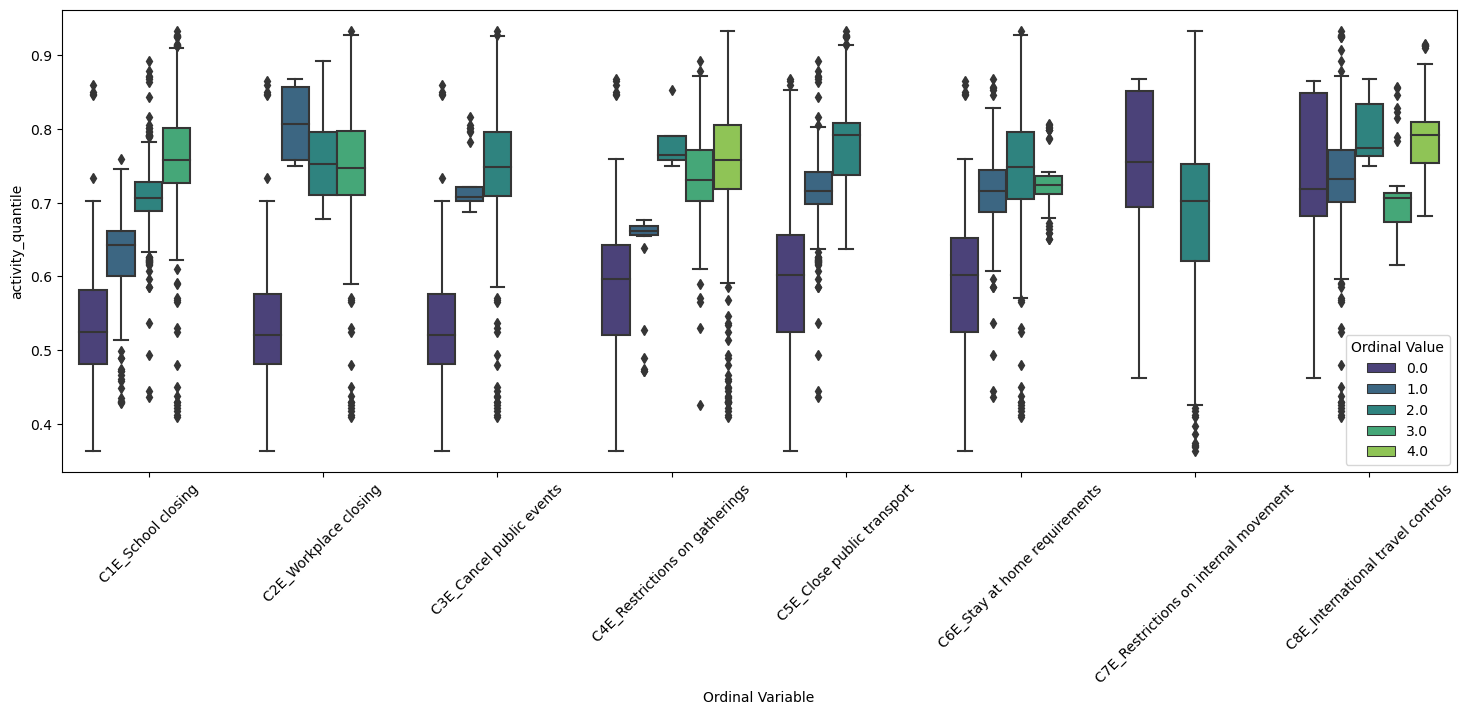

In [159]:
# Selecting the columns for correlation
correlation_data = df_closure_act[['C1E_School closing', 'C2E_Workplace closing', 'C3E_Cancel public events',
                                   'C4E_Restrictions on gatherings', 'C5E_Close public transport',
                                   'C6E_Stay at home requirements', 'C7E_Restrictions on internal movement',
                                   'C8E_International travel controls', 'activity_quantile']]

# Melt the DataFrame to create a long-form dataset for boxplot
melted_data = correlation_data.melt(id_vars='activity_quantile', var_name='Ordinal Variable', value_name='Value')

# Plotting boxplots to show the relationship between each ordinal variable and activity quantile
plt.figure(figsize=(18, 6))
sns.boxplot(x='Ordinal Variable', y='activity_quantile', data=melted_data, hue='Value', palette='viridis')
plt.xticks(rotation=45)
plt.legend(title='Ordinal Value')
plt.show()


In the context of correlation visualization using boxplots:

1. **Boxplot Overview:** Each boxplot represents the distribution of the `activity_quantile` concerning different ordinal variables (`C1E_School closing`, `C2E_Workplace closing`, etc.). The boxplot comprises several components:
    - **Box:** Represents the interquartile range (IQR) of the data. The box's lower and upper boundaries indicate the first (Q1) and third (Q3) quartiles, respectively. The length of the box demonstrates the spread of the middle 50% of the data. 
    - **Median Line:** Represents the median value of `activity_quantile` for each category of the ordinal variable.
    - **Whiskers:** Extend from the box's boundaries to the minimum and maximum values within a calculated distance from the quartiles.
    - **Outliers:** Points outside the whiskers represent potential outliers, which are individual data points that are significantly different from other observations.

2. **Correlation Understanding:** The boxplot helps observe how the distribution of `activity_quantile` varies concerning different values of ordinal variables. For instance:
    - **Position of Median Line:** The position of the median line within the box provides an idea about the central tendency of `activity_quantile` for each category of the ordinal variable.
    - **Box Length and Whisker Extension:** A wider box or longer whiskers may imply higher variability in `activity_quantile` across different values of the ordinal variable.
    - **Outliers:** Outliers in the boxplot can indicate extreme or uncommon values of `activity_quantile` for particular categories of the ordinal variable.

3. **Correlation Assessment:** By comparing the distributions of `activity_quantile` across different ordinal variable categories:
    - Strong correlation: If the medians or the overall spread of `activity_quantile` across categories are notably different for different values of the ordinal variable.
    - Weak or no correlation: If the medians and the spread of `activity_quantile` across categories are relatively similar or overlapping for different values of the ordinal variable.

Remember, while boxplots provide a visual representation of the relationship between `activity_quantile` and ordinal variables, a comprehensive understanding of correlation should involve statistical measures like Spearman's rank correlation coefficient, which quantifies the strength and direction of monotonic relationships between ordinal variables and `activity_quantile`.

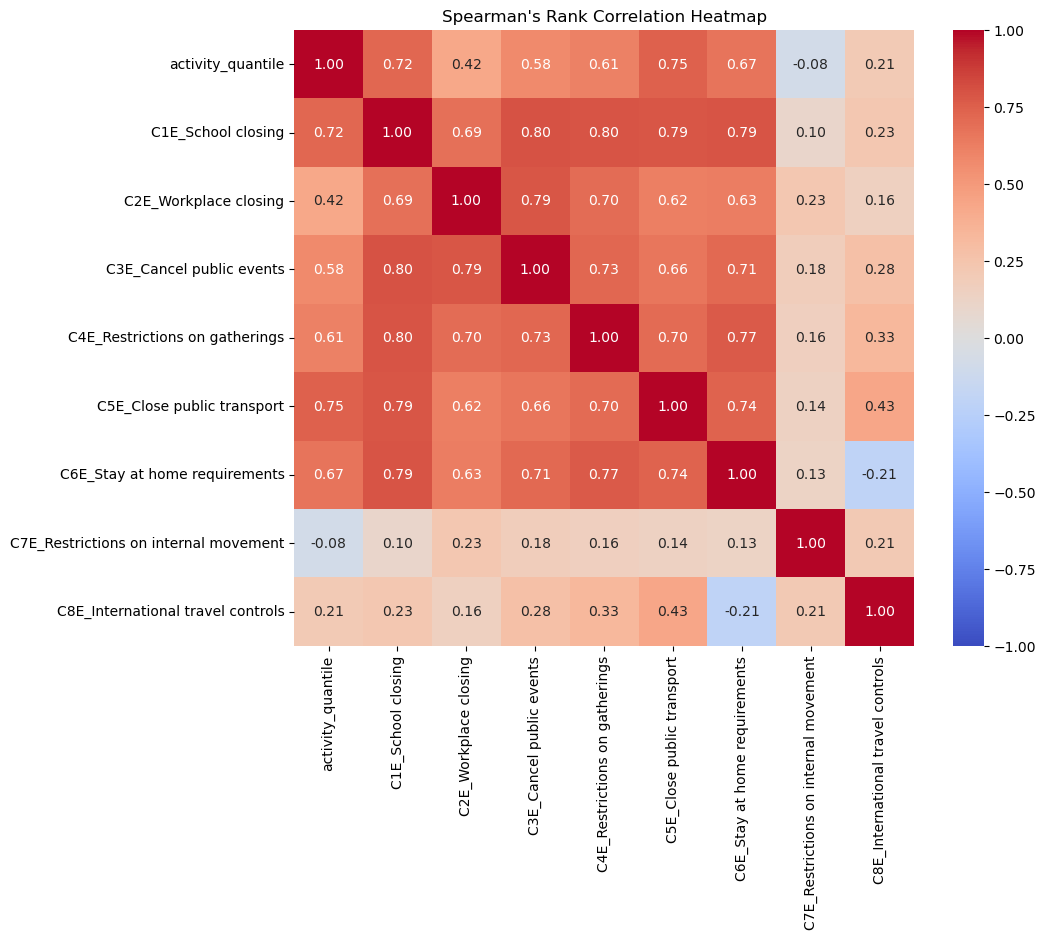

In [160]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_closure_act.corr(method='spearman',numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title('Spearman\'s Rank Correlation Heatmap')
plt.show()

Analysis of the Spearman's rank correlation coefficients between `activity_quantile` (representing business activity during the pandemic for a specific business vertical in a country) and the closure and containment policies indicated by various columns from the OxCGRT dataset:

1. **Strong Positive Monotonic Relationships:**
   - `activity_quantile` shows a strong positive monotonic relationship with `C1E_School closing` (0.724511). This suggests that higher school closure policies tend to correspond with increased business activity for the specified business vertical within a country during the pandemic.
   - Similarly, `C5E_Close public transport` displays a relatively strong positive monotonic relationship with `activity_quantile` (0.747067). This implies that stricter restrictions on public transport might coincide with higher business activity in the specified business vertical.

2. **Moderate Positive Monotonic Relationships:**
   - `C3E_Cancel public events` (0.576982) and `C4E_Restrictions on gatherings` (0.612778) also exhibit moderate positive monotonic relationships with `activity_quantile`. This suggests that more stringent measures to cancel public events or restrict gatherings could be associated with increased business activity. `C2E_Workplace closing` exhibits a moderate positive monotonic relationship with `activity_quantile` (0.422994). This implies that stricter closure of workplaces could be associated with increased business activity in the specified business vertical during the pandemic.

3. **Weak Relationships:**
   - `C7E_Restrictions on internal movement` (-0.078896) and `C8E_International travel controls` (0.205589) both display weak relationships with `activity_quantile`. This indicates that these specific containment policies might have limited impact on the business activity of the specified vertical in the country during the pandemic.

4. **Caveats and Further Investigation:**
   - While correlations provide insight, they don't establish causation. Thus, further investigation and domain knowledge are essential to understand the direction and nature of the relationship.
   - Other factors not captured in the dataset may also influence business activity, emphasizing the need for comprehensive analysis and consideration of various external factors.

5. **Actionable Insights:**
   - Policies such as school closures, restrictions on public transport, cancelation of public events, and limitations on gatherings may have some influence on business activity for the specific business vertical analyzed in the country during the pandemic.
   - Understanding the impact of these policies on business operations can aid in formulating adaptive strategies during similar crises.

This analysis provides a deeper understanding of how closure and containment policies might relate to business activity within a specific vertical during a pandemic. However, it's crucial to interpret these correlations judiciously and explore additional factors to gain comprehensive insights into the dynamics between containment policies and business activity.

In [161]:
df_closure_act.columns

Index(['date', 'activity_quantile', 'C1E_School closing',
       'C2E_Workplace closing', 'C3E_Cancel public events',
       'C4E_Restrictions on gatherings', 'C5E_Close public transport',
       'C6E_Stay at home requirements',
       'C7E_Restrictions on internal movement',
       'C8E_International travel controls'],
      dtype='object')

In [162]:
oxcgrt_df.query("CountryName == 'Brazil'")[oxcgrt_df.query("CountryName == 'Brazil'")['C2_Notes'].notna()][['C2_Notes']].head(15).iloc[0,0]

'Ministry of Health recommends that in areas where there are records of community transmission people should avoid commuting and work from home when possible. Link: https://web.archive.org/web/20200615101635/https://www.saude.gov.br/noticias/agencia-saude/46540-saude-anuncia-orientacoes-para-evitar-a-disseminacao-do-coronavirus  Rio de Janeiro recommends home office. Link: https://web.archive.org/web/20200615101924/https://prefeitura.rio/cidade/coronavirus-prefeitura-anuncia-medidas-de-prevencao-na-cidade-contra-a-doenca/'

Due to the messy nature of having all these line plots in one plot, what I'll focus on are the notes that were made for each policy. What I want is for each day that the notes section is not NaN, we'll draw a thin line from that day to the activity_quantile value that day. What we'll have is a plot that has a line graph and lines of different colors touching the activity_quantile.

In [163]:
oxcgrt_df.columns

Index(['CountryName', 'CountryCode', 'C1E_School closing', 'C1_Notes',
       'C2E_Workplace closing', 'C2_Notes', 'C3E_Cancel public events',
       'C3_Notes', 'C4E_Restrictions on gatherings', 'C4_Notes',
       'C5E_Close public transport', 'C5_Notes',
       'C6E_Stay at home requirements', 'C6_Notes',
       'C7E_Restrictions on internal movement', 'C7_Notes',
       'C8E_International travel controls', 'C8_Notes'],
      dtype='object')

In [164]:
df_pol_dates = pd.DataFrame({'date': oxcgrt_df.query("CountryName == 'Brazil'").reset_index()['Date'].values,
                             'activity_quantile': choice_df_busvert.query("(gadm_name == 'Brazil') & (business_vertical == 'All')")['activity_quantile'].values,
                             'C1_Notes': oxcgrt_df.query("CountryName == 'Brazil'")['C1_Notes'].values,
                             'C2_Notes': oxcgrt_df.query("CountryName == 'Brazil'")['C2_Notes'].values,
                             'C3_Notes': oxcgrt_df.query("CountryName == 'Brazil'")['C3_Notes'].values,
                             'C4_Notes': oxcgrt_df.query("CountryName == 'Brazil'")['C4_Notes'].values,
                             'C5_Notes': oxcgrt_df.query("CountryName == 'Brazil'")['C5_Notes'].values,
                             'C6_Notes': oxcgrt_df.query("CountryName == 'Brazil'")['C6_Notes'].values,
                             'C7_Notes': oxcgrt_df.query("CountryName == 'Brazil'")['C7_Notes'].values,
                             'C8_Notes': oxcgrt_df.query("CountryName == 'Brazil'")['C8_Notes'].values,
                             })

I'm interested in finding the amount of important were enacted in a particular day. That means finding the number of non empty rows for the notes section on each day.

In [165]:
df_pol_dates.notna().iloc[:,2:].sum(axis=1).value_counts()#normalize=True)*100

0    787
1    126
2     37
3     26
4      8
5      7
6      6
8      6
7      1
dtype: int64

In [166]:
df_pol_dates.notna().iloc[:,2:].sum(axis=1).values

array([0, 0, 0, ..., 0, 0, 8], dtype=int64)

In [167]:
plotData_policy = pd.DataFrame({'date':df_pol_dates['date'].values,
                              'activity_quantile': df_pol_dates['activity_quantile'].values,
                              'n_policies': df_pol_dates.notna().iloc[:,2:].sum(axis=1).values,
                              'label': df_pol_dates.notna().iloc[:,2:].sum(axis=1).values.astype(str)
                              })

# replace label columns (np.NaN for 0 policies)
plotData_policy.label.replace("0", np.NaN, inplace=True)
plotData_policy.label.replace("1", "1-2 policies", inplace=True)
plotData_policy.label.replace("2", "1-2 policies", inplace=True)
plotData_policy.label.replace("3", "3-4 policies", inplace=True)
plotData_policy.label.replace("4", "3-4 policies", inplace=True)
plotData_policy.label.replace("5", "5-8 policies", inplace=True)
plotData_policy.label.replace("6", "5-8 policies", inplace=True)
plotData_policy.label.replace("7", "5-8 policies", inplace=True)
plotData_policy.label.replace("8", "5-8 policies", inplace=True)

# replace 0 values in n_policies with NaN also
plotData_policy.n_policies.replace(0, np.NaN, inplace=True)

In [168]:
plotData_policy['label'].unique()
#plotData_policy.query("label == '5-8 policies'")

array([nan, '1-2 policies', '5-8 policies', '3-4 policies'], dtype=object)

NameError: name 'mpl' is not defined

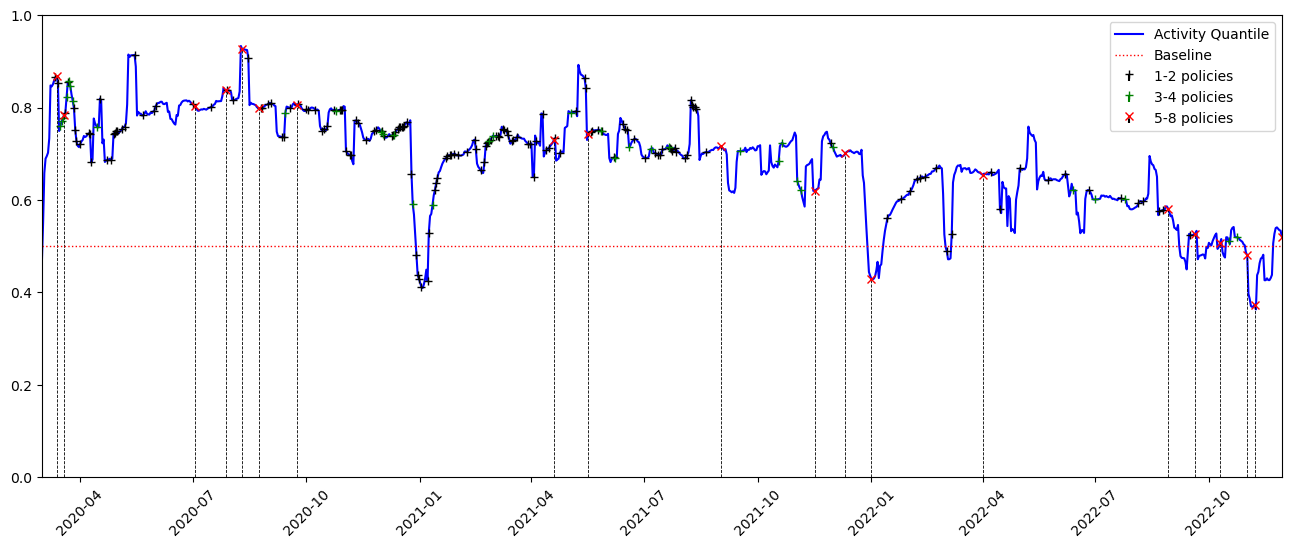

In [169]:
# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(16, 6))

# Line plot
ax1.plot(plotData_policy['date'], plotData_policy['activity_quantile'], color='blue', label='Activity Quantile')

# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '1-2 policies')")['date'], 
                                           plotData_policy.query("(label == '1-2 policies')")['activity_quantile'], 
                                           linefmt='k-', markerfmt='k+', basefmt=' ', label='1-2 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("(label == '3-4 policies')")['date'], 
                                           plotData_policy.query("(label == '3-4 policies')")['activity_quantile'], 
                                           linefmt='g-', markerfmt='g+', basefmt=' ', label='3-4 policies')
plt.setp(stemlines, linewidth=0)  # Adjust line width here
# Stem plot with colored stems based on labels
markerline, stemlines, baseline = ax1.stem(plotData_policy.query("label == '5-8 policies'")['date'], 
                                           plotData_policy.query("label == '5-8 policies'")['activity_quantile'], 
                                           linefmt='k--', markerfmt='rx', basefmt=' ', label='5-8 policies')
plt.setp(stemlines, linewidth=0.6)  # Adjust line width here

# baseline
ax1.axhline(y=0.5,color='red', label='Baseline',linewidth=1, linestyle=":")

# Formatting
# put legends
ax1.legend()

# set x-axis limit to the range of dates in the data
ax1.set_xlim([plotData_policy['date'].min()+pd.DateOffset(days=0), plotData_policy['date'].max()+pd.DateOffset(days=0)])
ax1.set_ylim([0,1])

# rotate the x-axis tick labels for readability
ax1.tick_params(axis='x', rotation=45)

# Get the unique years in your dataset
unique_years = plotData_policy.dropna()['date'].dt.year.unique()

# set the major ticks to be at the beginning of each year
ax1.xaxis.set_major_locator(mpl.dates.YearLocator())
ax1.xaxis.set_major_formatter(mpl.dates.DateFormatter('\n\n%Y'))

# set the minor ticks to be at the beginning of each month
ax1.xaxis.set_minor_locator(mpl.dates.MonthLocator())
ax1.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%b'))

# labels and title
ax1.set_xlabel('Date')
ax1.set_ylabel('Activity Quantile')
ax1.set_title("Policies for Brazil and Business Vertical")

plt.tight_layout()
plt.show()